# USEFUL FUNCTIONS

In [1]:
def plotting_percentages_sbn(df, col, target):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

In [2]:
def plotting_percentages_plotly(df, col, target):

    # Creates a temporary dataframe to get the percentages
    temp_df = df.groupby(col)[target].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()
    temp_df['Percent'] = temp_df['Percent'].round(decimals=1)

    # Plot the percentages with the temporary dataframe
    fig = px.bar(temp_df, x=col, y='Percent', color=target, 
                    barmode="overlay", text='Percent', title=f"Percent {target} By {col}")

    return fig
# barmode: group,stac,relative,overlay

In [3]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [4]:

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [5]:
# New data function to find percentages of different categories with target variable
def perc_with_target(feature,target):
    new_df = df.groupby(feature)[target].value_counts(normalize=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()
    return new_df

In [6]:
# New data function to find percentages of different categories without target variable
def perc_without_target(feature):
    new_df = df[feature].value_counts(normalize=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()
    return new_df

In [7]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

## PART I: PROBLEM UNDERSTANDING AND EDA
1. Importing libraries
2. Reading Data
3. Discriptive analyises
     1. Number of variabel, Type of variable and number of nulls
     1. Repeated data
     1. Statistical discription
4. Univariate analysis and missing value imputation
5. Bivariate analysis

In [7]:
# 1. Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import math
from collections import Counter
import scipy.stats as ss
import itertools

In [8]:
# 2. Reading data
df = pd.read_csv('ABC_payments_bank_credcard_train.csv')


In [9]:
# TRANSFORMATION CODE FROM EDA
# 1. DELETING USER ID
del df["user_id"]

# 2. AGE FROM DOB
from datetime import datetime, date


def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['Age'] = df['date_of_birth'].apply(age)

# 3. AGE GROUP FROM AGE
df['age_group'] = pd.cut(df.Age, bins=[0,25,35,45,55,65,75,99], labels =['0-25','25-35','35-45','45-55','55-65','65-75','75-99'])

# 4. STATE AND ZIPCODE FROM ADRESS
df['zipcode'] = df['address'].str[-5:]
df['state'] = df['address'].str[-8:-6]


# 6. EDUCATINO GROUPS
df['edu_group'] = pd.cut(df.education_num, bins=[0,2,6,8,10,12,13,14,17], labels =['pre','matri','hs','diplo','asso','grad','pg','phd'])

In [3]:
# Overlook of data
df.head(2)

user_id   gender date_of_birth workclass  \
0  99103af1-b568-4484-b443-1997b8bd4711     Male    04/01/1981   Private   
1  3d407c1e-762f-4ec7-895e-2d3c55ee10c5   Female    10/01/1958   Private   

  education_level  education_num       marital_status       occupation  \
0         Masters             14   Married-civ-spouse     Adm-clerical   
1         Masters             14             Divorced   Prof-specialty   

     relationship  capital_gain  ...  hours_per_week  approved  \
0         Husband             0  ...              40         0   
1   Not-in-family             0  ...              45         0   

                                                address                 email  \
0   9520 Ryan Burg Apt. 460\r\nLake Dawnmouth, RI 33907     debra88@gmail.com   
1  1194 Clark Neck Apt. 089\r\nBrandonchester, AK 84997  tbaldwin@raymond.com   

  inquiry_purpose_code  institute_type account_type  asset_class_cd  \
0                 13.0             NBF          130               S   
1                 99.0             NBF          173               S   

  asset_code  portfolio_type  
0        1.0               I  
1        1.0               I  

[2 rows x 21 columns]

In [4]:
# 3.A. Number of variables: 21; Non-null count and Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               39999 non-null  object 
 1   gender                39999 non-null  object 
 2   date_of_birth         39999 non-null  object 
 3   workclass             39999 non-null  object 
 4   education_level       39999 non-null  object 
 5   education_num         39999 non-null  int64  
 6   marital_status        39999 non-null  object 
 7   occupation            39999 non-null  object 
 8   relationship          39999 non-null  object 
 9   capital_gain          39999 non-null  int64  
 10  capital_loss          39999 non-null  int64  
 11  hours_per_week        39999 non-null  int64  
 12  approved              39999 non-null  int64  
 13  address               39999 non-null  object 
 14  email                 39999 non-null  object 
 15  inquiry_purpose_cod

In [5]:
# 3.A. Number of missing values for each column
df.isna().sum()

user_id                     0
gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
address                     0
email                       0
inquiry_purpose_code     1129
institute_type              0
account_type                0
asset_class_cd          31636
asset_code                 74
portfolio_type              5
dtype: int64

<AxesSubplot:>

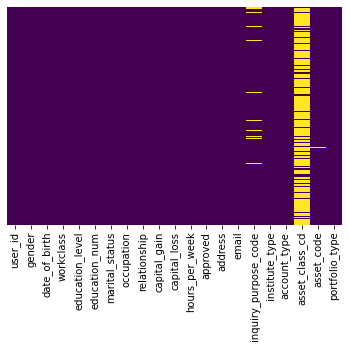

In [6]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [7]:
df.nunique()

user_id                 39999
gender                      2
date_of_birth              73
workclass                   7
education_level            16
education_num              16
marital_status              7
occupation                 14
relationship                6
capital_gain              121
capital_loss               95
hours_per_week             96
approved                    2
address                 39999
email                   39259
inquiry_purpose_code       18
institute_type             10
account_type               37
asset_class_cd              8
asset_code                  4
portfolio_type              4
dtype: int64

## Target Variable

In [19]:
#Checking target variable
print(df['approved'].value_counts())
Approved_Percentage = len(df[df['approved']==1])/df['approved'].value_counts().sum()*100
print(Approved_Percentage)

0    30125
1     9874
Name: approved, dtype: int64
24.685617140428512


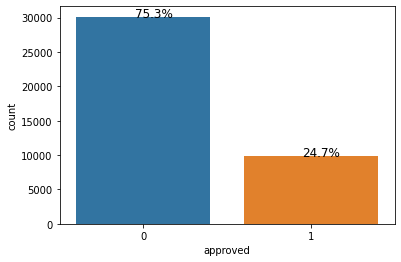

In [20]:
ax = sns.countplot(data=df,x='approved')
without_hue(ax, df['approved'])

# Cramer's Matrix
## We first check the approved variable and the variables directly affecting it.

In [23]:
cat_column= df.columns.drop(['zipcode','date_of_birth','address','email','Age','capital_gain','capital_loss','hours_per_week'])

In [24]:
cramer_coeff = pd.DataFrame([str, float])
for i in cat_column:
    print(i,(cramers_v(df['approved'],df[i])))

gender 0.217203163030718
workclass 0.1664618530990829
education_level 0.36468705405588814
education_num 0.36468705405588814
marital_status 0.45105105030963344
occupation 0.3458245131901943
relationship 0.45703119925694835
approved 0.99993276276926
inquiry_purpose_code 0.23733626313226341
institute_type 0.1079992666570821
account_type 0.1198466647817118
asset_class_cd 0.09865019324210805
asset_code 0.0179038199376984
portfolio_type 0.09162690122861365
age_group 0.3051366589276818
state 0.0
edu_group 0.36359585540162914


In [26]:
# Diagonals column are not considering in cols

cols = cat_column.tolist()
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

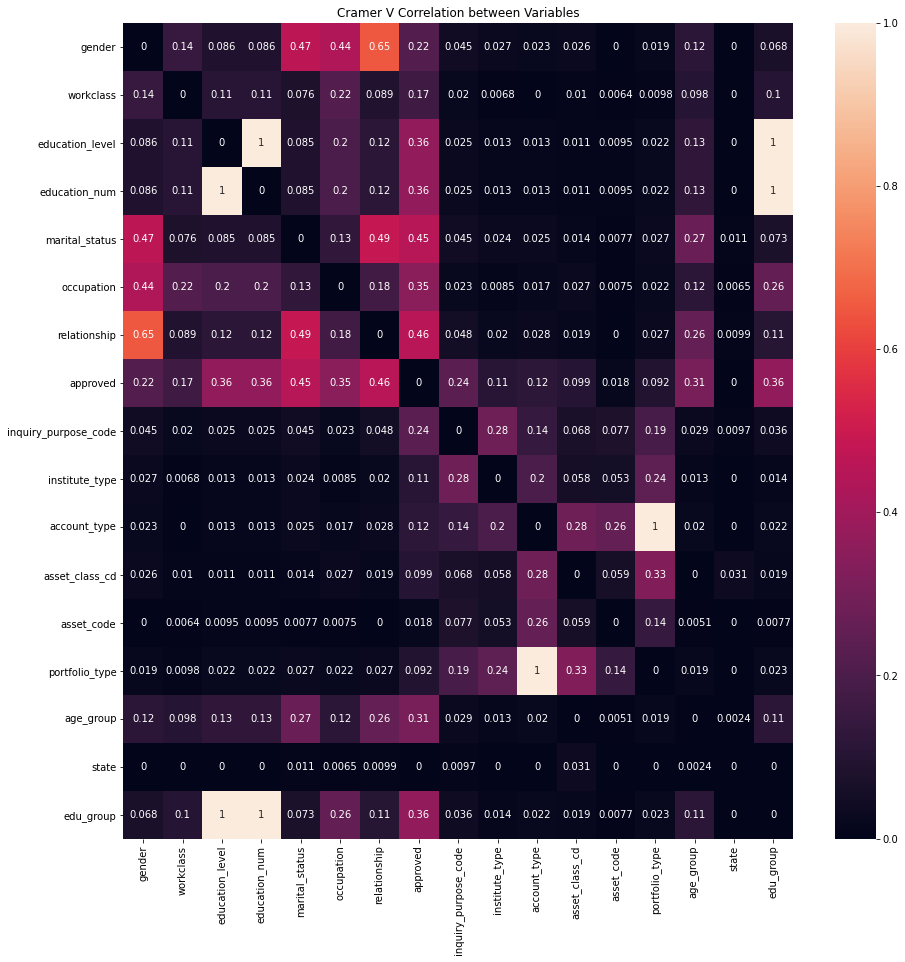

In [27]:
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

## User_id

In [28]:
#USER_ID deleting it as all of them are unique and seem to have no usefula data in them
del df["user_id"]
df.columns

KeyError: 'user_id'

## Gender
* Percentage of male is very high and the approval rate varies among gender (Female: 11%, Male 31%) so we may analyse them seperately
* Factors like workclass, education, occupation are nearly same amongst both
* Women have poor relationship and bcoz relationship affects the approval, women have lower approval

<b> Incase gender is missing, relationship can be used


In [18]:
#Considering Gender
print(df['gender'].value_counts())

 Male      26983
 Female    13016
Name: gender, dtype: int64


In [19]:
perc_without_target('gender')

index    Percent
0     Male  67.459186
1   Female  32.540814

In [20]:
#Checking approval rate with gender
perc_with_target('gender','approved')

gender  approved    Percent
0   Female         0  88.806085
1   Female         1  11.193915
2     Male         0  68.806285
3     Male         1  31.193715

In [53]:
# Checking occupation with gender
pd.crosstab(df['gender'],df['education_level']).apply(lambda r: r/r.sum()*100, axis=1)

education_level      10th      11th      12th   1st-4th   5th-6th   7th-8th  \
gender                                                                        
 Female          2.704364  3.826060  1.221573  0.391825  0.737554  1.336816   
 Male            2.657229  3.509617  1.319349  0.537375  1.126635  2.023496   

education_level       9th   Assoc-acdm   Assoc-voc   Bachelors   Doctorate  \
gender                                                                       
 Female          1.252305     3.964352    4.532883   15.788261    0.791334   
 Male            1.604714     3.016714    4.147056   17.118186    1.426824   

education_level    HS-grad   Masters   Preschool   Prof-school   Some-college  
gender                                                                         
 Female          31.768593  5.454825    0.122926      0.845114      25.261217  
 Male            33.261683  5.644295    0.177890      2.138383      20.290553

In [92]:
# Checking inquiry purpose code with gender
pd.crosstab(df['gender'],df['inquiry_purpose_code']).apply(lambda r: r/r.sum()*100, axis=1)

inquiry_purpose_code      1.0       2.0       3.0       4.0       5.0   \
gender                                                                   
 Female               0.832211  5.936435  0.253626  0.071332  0.253626   
 Male                 0.765627  5.306060  0.285682  0.106654  0.312345   

inquiry_purpose_code      6.0        7.0       8.0       9.0       10.0  \
gender                                                                    
 Female               1.109614  11.777760  0.491400  0.007926  0.467623   
 Male                 1.093208  14.169809  0.346627  0.015236  0.380909   

inquiry_purpose_code      11.0      12.0       13.0      14.0      16.0  \
gender                                                                    
 Female               0.301181  0.000000  48.981533  2.139970  8.131886   
 Male                 0.232354  0.011427  45.621453  2.689216  7.964804   

inquiry_purpose_code      17.0      18.0       99.0  
gender                                               
 Female               0.047555  0.015852  19.180471  
 Male                 0.049518  0.019045  20.630023

In [93]:
# Checking workclass with gender
pd.crosstab(df['gender'],df['workclass']).apply(lambda r: r/r.sum()*100, axis=1)

workclass   Federal-gov   Local-gov    Private   Self-emp-inc  \
gender                                                          
 Female        2.973264    8.604794  77.773510       1.382913   
 Male          3.176074    6.011192  71.759997       4.765964   

workclass   Self-emp-not-inc   State-gov   Without-pay  
gender                                                  
 Female             4.156423    5.055317      0.053780  
 Male              10.399140    3.843161      0.044472

In [94]:
# Checking relationship with gender
pd.crosstab(df['gender'],df['relationship']).apply(lambda r: r/r.sum()*100, axis=1)

relationship    Husband   Not-in-family   Other-relative   Own-child  \
gender                                                                 
 Female        0.007683       36.893055         4.179471   19.837124   
 Male         61.283030       20.386910         2.445985   12.096505   

relationship   Unmarried       Wife  
gender                               
 Female        24.892440  14.190227  
 Male           3.783864   0.003706

In [100]:
# asset code with gender
pd.crosstab(df['gender'],df['asset_code']).apply(lambda r: r/r.sum()*100, axis=1)

asset_code       1.0       2.0       4.0       19.0
gender                                             
 Female     96.652301  2.739726  0.469447  0.138525
 Male       96.899484  2.536111  0.427017  0.137388

In [99]:
# Portfolio type with gender
pd.crosstab(df['gender'],df['portfolio_type']).apply(lambda r: r/r.sum()*100, axis=1)

portfolio_type         F          I         M          R
gender                                                  
 Female         0.015367  38.908951  2.220515  58.855167
 Male           0.025946  37.206716  2.683569  60.083769

## DOB

1. People with age from 25-70 have a very high acceptance
Age have almost equal distribution from 20 to 50 but still the approval rate increases from 25 to 70
2. More People from 25 to 70 have capital gain and loss which indicates that they activel do transactions thus have higher approval rate but this not affect approval rate
3. Checked other variables with age
4. Age affects approval rate only because of a longer life remaining to pay



In [5]:
#DOB
#Converting birthdate to age
#CURRENTLY NOT DELETING THE BIRTHDATE BECAUSE EMAIL ADDRESS AND BIRTHDATE TOGETHER CAN BE SIGNIFICANT


from datetime import datetime, date


def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['Age'] = df['date_of_birth'].apply(age)


In [10]:
df['Age'].sort_values()

12245    18
29422    18
30869    18
32270    18
11814    18
         ..
23926    91
39360    91
36792    91
39030    91
1339     91
Name: Age, Length: 39999, dtype: int64

In [10]:
# Plotting percentage approved wrt age and adding count in percentage for different ages
temp_df = df.groupby('Age')['approved'].value_counts(normalize=True)
temp_df = temp_df.mul(100).rename('Percent').reset_index()
temp_df['Percent'] = temp_df['Percent'].round(decimals=1)

    # Plot the percentages with the temporary dataframe
fig = px.bar(temp_df, x='Age', y='Percent', color='approved', 
                    barmode="overlay", text='Percent', title=f"Percent approved By Age")

df1 = perc_without_target('Age')
fig.add_trace(go.Bar( x=df1['index'], y=df1['Percent']))
fig.show()

<AxesSubplot:xlabel='Age', ylabel='capital_gain'>

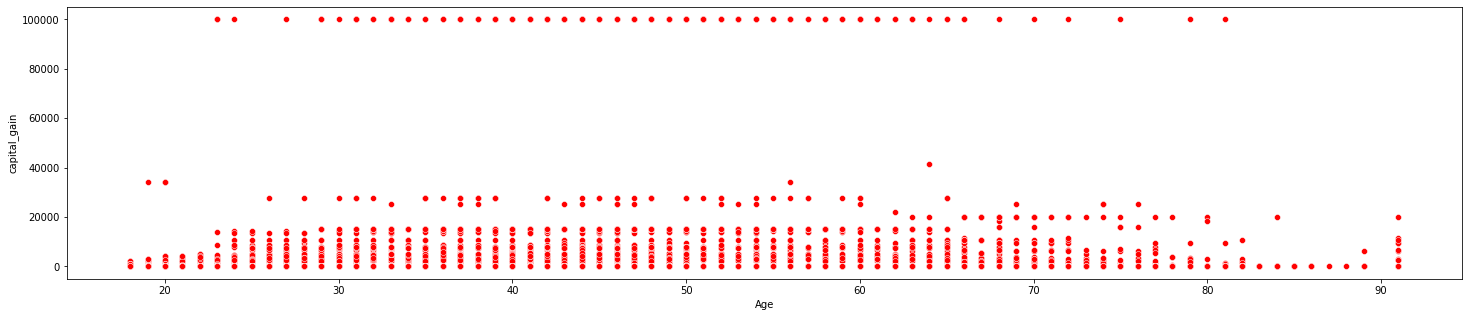

In [27]:
plt.figure(figsize=(25,5))
sns.scatterplot(x='Age',y='capital_gain', data=df, color = 'red')

<AxesSubplot:xlabel='Age', ylabel='capital_loss'>

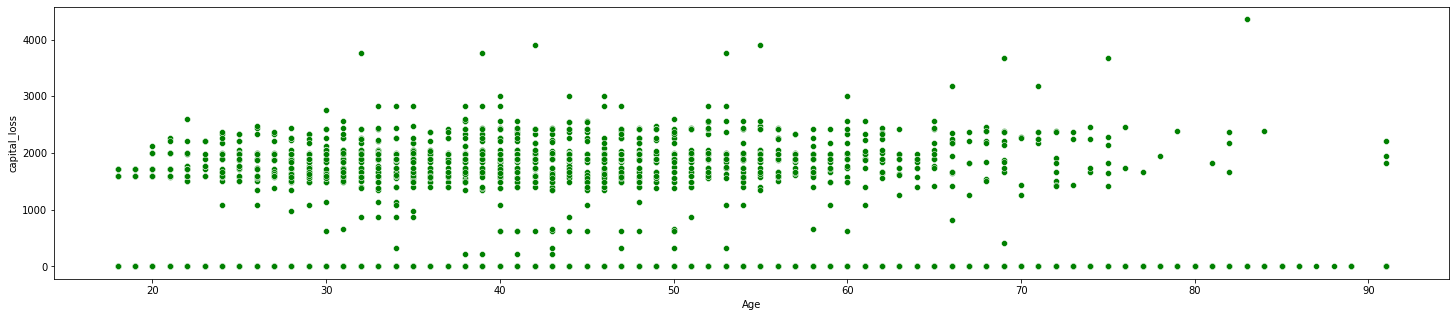

In [28]:
# Check the variation of capital gain with Age
plt.figure(figsize=(25,5))
sns.scatterplot(x='Age',y='capital_loss', data=df, color = 'green')

In [27]:
# Variation of asset with age
pd.crosstab(df['Age'],df['relationship']).apply(lambda r: r/r.sum()*100, axis=1)

In [11]:
# Creating buckets for easier understanding

df['age_group'] = pd.cut(df.Age, bins=[0,25,35,45,55,65,75,90], labels =['0-25','25-35','35-45','45-55','55-65','65-75','75-90'])

In [107]:
pd.crosstab(df['age_group'],df['relationship']).apply(lambda r: r/r.sum()*100, axis=1)

relationship    Husband   Not-in-family   Other-relative   Own-child  \
age_group                                                              
0-25           6.859709       24.605141         6.240322   55.713843   
25-35         35.119726       31.622957         3.496769   14.433675   
35-45         51.231480       22.753512         1.558591    4.858572   
45-55         55.703524       22.141512         1.829432    2.273339   
55-65         57.916886       24.092583         2.340873    1.209890   
65-75         54.528986       31.068841         3.532609    0.181159   
75-90         45.643154       43.153527         2.904564    0.000000   

relationship   Unmarried      Wife  
age_group                           
0-25            5.032518  1.548467  
25-35          10.176739  5.150133  
35-45          13.623244  5.974601  
45-55          12.859833  5.192359  
55-65           9.942136  4.497633  
65-75           8.605072  2.083333  
75-90           7.053942  1.244813

In [108]:
pd.crosstab(df['age_group'],df['portfolio_type']).apply(lambda r: r/r.sum()*100, axis=1)

portfolio_type         F          I         M          R
age_group                                               
0-25            0.000000  39.903995  2.229793  57.866212
25-35           0.028506  38.388445  2.242493  59.340555
35-45           0.028866  37.178870  2.742230  60.050034
45-55           0.000000  36.194833  2.798708  61.006459
55-65           0.052632  38.236842  2.789474  58.921053
65-75           0.000000  35.235507  2.536232  62.228261
75-90           0.414938  32.365145  2.074689  65.145228

In [109]:
pd.crosstab(df['age_group'],df['inquiry_purpose_code']).apply(lambda r: r/r.sum()*100, axis=1)

inquiry_purpose_code      1.0       2.0       3.0       4.0       5.0   \
age_group                                                                
0-25                  1.104000  6.016000  0.336000  0.080000  0.368000   
25-35                 0.733640  5.781082  0.332583  0.097819  0.342365   
35-45                 0.671937  5.276680  0.286561  0.098814  0.217391   
45-55                 0.815030  5.194088  0.207211  0.096698  0.248653   
55-65                 0.596691  5.234608  0.189856  0.081367  0.379713   
65-75                 1.023256  5.209302  0.000000  0.186047  0.093023   
75-90                 0.847458  5.508475  0.423729  0.000000  0.423729   

inquiry_purpose_code      6.0        7.0       8.0       9.0       10.0  \
age_group                                                                 
0-25                  1.328000  10.400000  0.512000  0.016000  0.496000   
25-35                 1.173824  12.383840  0.410838  0.009782  0.440184   
35-45                 1.047431  14.476285  0.365613  0.009881  0.316206   
45-55                 0.773588  15.292167  0.372980  0.027628  0.359166   
55-65                 1.328994  14.184974  0.298346  0.000000  0.542446   
65-75                 0.930233  13.767442  0.372093  0.000000  0.465116   
75-90                 1.271186  16.525424  0.000000  0.000000  0.000000   

inquiry_purpose_code      11.0      12.0       13.0      14.0      16.0  \
age_group                                                                 
0-25                  0.352000  0.000000  52.032000  2.032000  7.664000   
25-35                 0.273892  0.019564  47.803971  2.152010  8.353712   
35-45                 0.256917  0.009881  44.416996  2.579051  8.290514   
45-55                 0.179583  0.000000  44.716121  3.011466  7.791131   
55-65                 0.162734  0.000000  45.619745  2.956333  7.621372   
65-75                 0.186047  0.000000  45.674419  3.069767  7.069767   
75-90                 0.847458  0.000000  41.525424  2.966102  9.745763   

inquiry_purpose_code      17.0      18.0       99.0  
age_group                                            
0-25                  0.064000  0.032000  17.168000  
25-35                 0.039127  0.029346  19.622420  
35-45                 0.049407  0.009881  21.620553  
45-55                 0.055256  0.013814  20.845421  
55-65                 0.054245  0.000000  20.748576  
65-75                 0.000000  0.000000  21.953488  
75-90                 0.000000  0.000000  19.915254

In [111]:
pd.crosstab(df['age_group'],df['occupation']).apply(lambda r: r/r.sum()*100, axis=1)

occupation   Adm-clerical   Armed-Forces   Craft-repair   Exec-managerial  \
age_group                                                                   
0-25            15.980180       0.061939       8.315268          4.567978   
25-35           12.694793       0.038008      14.851767         11.488027   
35-45           10.813931       0.019242      15.701366         15.903406   
45-55           10.747915       0.026903      13.909066         17.662093   
55-65           11.283535       0.000000      13.177275         15.938979   
65-75           11.503623       0.000000       6.431159         15.126812   
75-90           13.278008       0.000000       4.564315         16.182573   

occupation   Farming-fishing   Handlers-cleaners   Machine-op-inspct  \
age_group                                                              
0-25                3.034995            9.306287            6.131929   
25-35               2.679590            5.121627            7.164576   
35-45               3.184530            3.165288            6.744276   
45-55               2.623083            2.676890            6.564434   
55-65               4.523935            2.367175            6.233561   
65-75               8.061594            2.717391            3.623188   
75-90              11.618257            2.074689            1.659751   

occupation   Other-service   Priv-house-serv   Prof-specialty  \
age_group                                                       
0-25             21.399814          0.665841         6.348715   
25-35             9.530597          0.323071        13.702014   
35-45             7.610160          0.259765        15.576294   
45-55             7.842346          0.443906        15.563627   
55-65             9.600210          0.815360        13.519200   
65-75            12.862319          2.355072        11.865942   
75-90            12.448133          3.734440        12.863071   

occupation   Protective-serv      Sales   Tech-support   Transport-moving  
age_group                                                                  
0-25                1.471044  17.280892       2.446578           2.988541  
25-35               2.641581  10.661345       4.028886           5.074116  
35-45               2.078122  10.101982       3.444295           5.397345  
45-55               2.219532  10.990046       2.959376           5.770783  
55-65               1.788532  11.415045       2.367175           6.970016  
65-75               2.807971  16.032609       1.630435           4.981884  
75-90               3.319502  14.107884       0.829876           3.319502

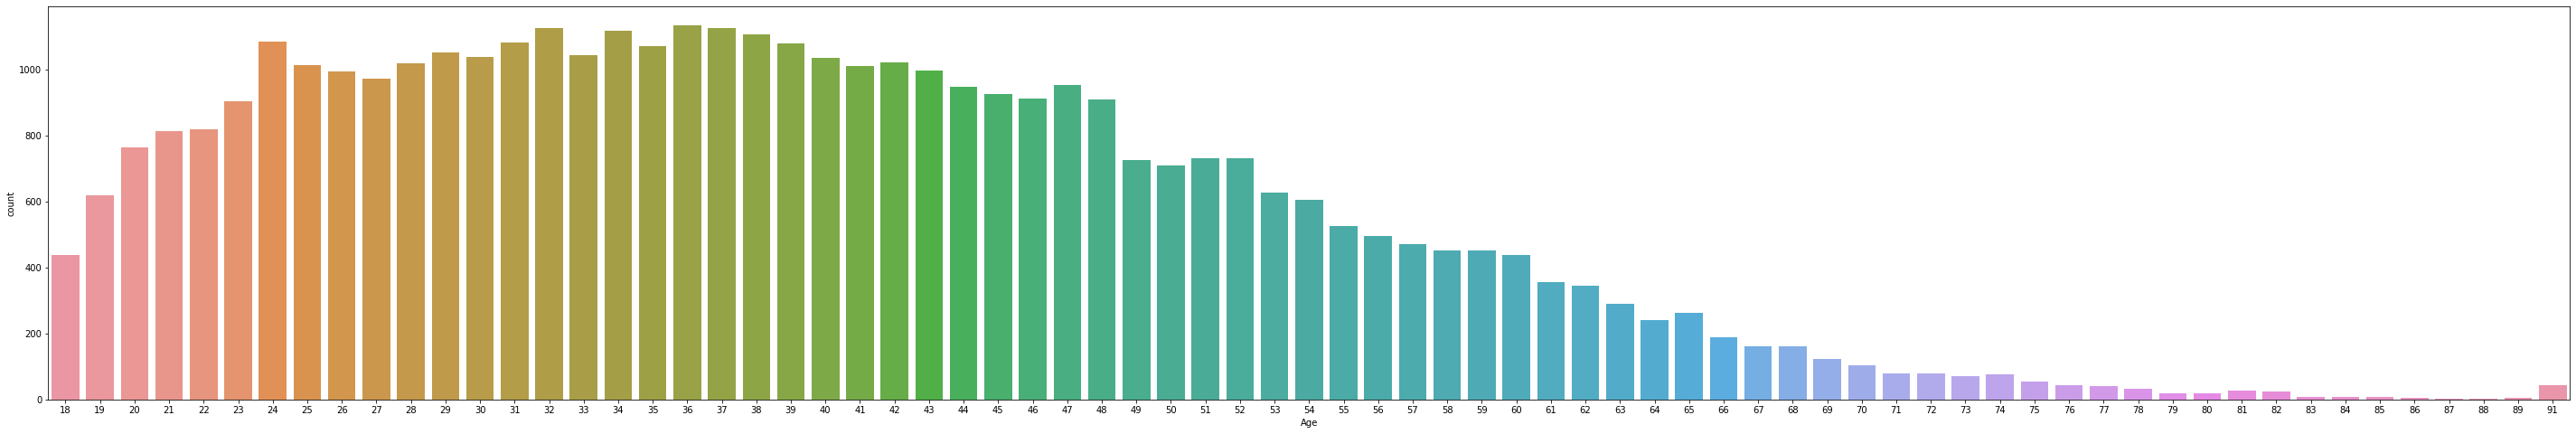

In [29]:
plt.figure(figsize=(50,8))
ax = sns.countplot(data=df,x='Age')

## Address

Tried exploring the address, on extracting these, we find that zipcodes are too unique so we delete them.
The City code at the end of address isn't fruitfull either so we delete those as well

* Extra 4 states of America are millitary regions AA,AE, AL, AP
* Gender ratio, relationship, occupation, age group are nearly same accross all states

<b> Nothing significant could be derived from states

In [30]:
df['address'].head(25)

0           9520 Ryan Burg Apt. 460\r\nLake Dawnmouth, RI 33907
1          1194 Clark Neck Apt. 089\r\nBrandonchester, AK 84997
2                    91982 Lucero Glens\r\nWest David, DE 89054
3        650 Donald Springs Apt. 253\r\nSouth Natalie, DC 03978
4     6168 Brandon Plains Apt. 476\r\nChristopherbury, AZ 50368
5                                USCGC Anderson\r\nFPO AA 05676
6        62700 Glenn Course Suite 291\r\nEast Heather, AZ 32189
7              753 Hicks Springs\r\nNorth Williambury, SD 00952
8                     2637 Malik Fields\r\nEast Shari, KS 13866
9        46735 Leonard Neck Suite 323\r\nNorth Robert, KS 89144
10               31869 Hopkins Viaduct\r\nWest Taylor, CO 25996
11       03427 Quinn Orchard Suite 742\r\nBrandishire, SC 23649
12                        892 Brown Light\r\nCruzview, MI 33638
13           1950 Singh Canyon Apt. 919\r\nKevinmouth, TN 12675
14         464 Fitzgerald Pine Apt. 837\r\nJamesmouth, MA 93424
15            595 James Views Suite 383\

In [12]:
# ADDRESS Zipcode and city might be useful

df['zipcode'] = df['address'].str[-5:]
df['state'] = df['address'].str[-8:-6]

In [112]:
df['zipcode'].describe()

count     39999
unique    32978
top       97397
freq          5
Name: zipcode, dtype: object

In [125]:
df['state'].drop_duplicates().sort_values()

5      AA
22     AE
1      AK
104    AL
62     AP
119    AR
4      AZ
105    CA
10     CO
50     CT
3      DC
2      DE
20     FL
44     GA
42     HI
31     IA
79     ID
28     IL
122    IN
8      KS
136    KY
55     LA
14     MA
15     MD
52     ME
12     MI
75     MN
26     MO
19     MS
18     MT
27     NC
51     ND
113    NE
49     NH
60     NJ
30     NM
46     NV
33     NY
16     OH
47     OK
32     OR
38     PA
0      RI
11     SC
7      SD
13     TN
156    TX
88     UT
29     VA
45     VT
40     WA
34     WI
21     WV
197    WY
Name: state, dtype: object

In [70]:
df[df['approved']==1]['state'].value_counts()/df['state'].value_counts()

AA    0.252865
AE    0.251572
AK    0.245997
AL    0.238784
AP    0.239427
AR    0.285322
AZ    0.254310
CA    0.219750
CO    0.253918
CT    0.241018
DC    0.243516
DE    0.240713
FL    0.264286
GA    0.247839
HI    0.239612
IA    0.238450
ID    0.242938
IL    0.242424
IN    0.262873
KS    0.220979
KY    0.220610
LA    0.242245
MA    0.263305
MD    0.240232
ME    0.226442
MI    0.256552
MN    0.259912
MO    0.253501
MS    0.228687
MT    0.237082
NC    0.254630
ND    0.239766
NE    0.239496
NH    0.247525
NJ    0.240109
NM    0.246224
NV    0.269795
NY    0.238095
OH    0.233696
OK    0.250358
OR    0.271967
PA    0.250370
RI    0.205755
SC    0.256233
SD    0.272198
TN    0.206461
TX    0.248074
UT    0.244170
VA    0.251479
VT    0.265130
WA    0.248285
WI    0.263598
WV    0.276204
WY    0.253316
Name: state, dtype: float64

In [11]:
# Visualising approval rate and adding count of population wrt different states
x1= df['state'][df['approved']==1]
x2 = df['state']#[df['approved']==0]
x4 = df['state'].drop_duplicates()

trace1 = go.Histogram(
    x=x1,
    opacity=0.75,
    name = "APPROVED",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2,
    opacity=0.75,
    name = "Number of people in city",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
trace3 = go.Scatter(
    x= x4,
    y=x3,
    mode = "markers",
    marker = dict(color = 'rgba(180, 26, 80, 0.8)'),
    opacity=0.75,
    name = "Ratio")

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title=' City hist',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [127]:
pd.crosstab(df['state'],df['relationship']).apply(lambda r: r/r.sum()*100, axis=1)

relationship    Husband   Not-in-family   Other-relative   Own-child  \
state                                                                  
AA            42.836676       25.000000         3.080229   14.828080   
AE            41.509434       24.598183         3.633823   14.884696   
AK            41.484716       28.529840         1.892285   14.847162   
AL            42.547033       24.457308         3.039074   16.353111   
AP            40.381992       26.466576         3.274216   15.416098   
AR            45.953361       23.731139         4.526749   12.757202   
AZ            40.517241       27.011494         3.304598   14.655172   
CA            43.949930       24.200278         4.450626   13.630042   
CO            43.103448       25.391850         2.194357   13.322884   
CT            40.419162       28.293413         2.694611   12.275449   
DC            40.489914       27.665706         2.737752   14.265130   
DE            38.781575       26.894502         3.417533   14.561664   
FL            45.000000       26.428571         2.285714   13.428571   
GA            40.201729       24.927954         3.025937   15.561960   
HI            41.551247       24.515235         2.770083   14.542936   
IA            41.132638       26.080477         3.576751   15.648286   
ID            39.830508       24.717514         3.531073   16.525424   
IL            40.151515       28.181818         1.666667   15.000000   
IN            41.192412       26.151762         2.168022   15.176152   
KS            38.321678       27.272727         5.034965   15.244755   
KY            41.074020       23.076923         2.612482   16.545718   
LA            39.290990       24.076809         3.249631   15.509601   
MA            43.557423       25.490196         1.960784   13.445378   
MD            41.534009       26.483357         2.315485   14.471780   
ME            41.912799       25.738397         1.687764   13.783404   
MI            43.724138       21.103448         1.931034   16.275862   
MN            43.906021       24.229075         2.349486   13.215859   
MO            41.596639       26.750700         2.941176   13.445378   
MS            39.512855       28.687415         2.571042   13.802436   
MT            41.185410       25.683891         2.431611   16.261398   
NC            43.055556       25.617284         2.160494   14.506173   
ND            39.766082       25.146199         3.801170   14.181287   
NE            38.515406       27.030812         2.521008   13.865546   
NH            39.038190       27.298444         2.263083   13.437058   
NJ            41.882674       26.466576         4.092769   14.188267   
NM            40.181269       25.075529         2.870091   15.105740   
NV            39.149560       25.953079         3.372434   15.542522   
NY            38.481338       27.413127         2.702703   14.800515   
OH            40.217391       28.532609         3.940217   14.809783   
OK            44.349070       23.175966         3.576538   14.592275   
OR            41.980474       25.104603         2.928870   15.202232   
PA            40.444444       25.777778         2.962963   15.703704   
RI            38.992806       27.338129         3.741007   13.381295   
SC            44.736842       23.684211         2.908587   12.880886   
SD            41.339156       23.871907         2.474527   15.720524   
TN            37.640449       25.000000         2.387640   17.837079   
TX            42.218798       26.348228         4.314330   11.556240   
UT            39.231824       29.492455         2.469136   15.500686   
VA            41.568047       27.366864         3.402367   12.869822   
VT            44.668588       23.198847         2.161383   14.841499   
WA            40.877915       27.023320         3.840878   12.071331   
WI            40.027894       24.128312         3.207810   17.015342   
WV            44.759207       23.937677         3.824363   14.164306   
WY            42.307692       26.127321 

In [128]:
pd.crosstab(df['state'],df['gender']).apply(lambda r: r/r.sum()*100, axis=1)

gender     Female       Male
state                       
AA      32.163324  67.836676
AE      31.865828  68.134172
AK      32.751092  67.248908
AL      34.442836  65.557164
AP      31.173261  68.826739
AR      30.589849  69.410151
AZ      32.614943  67.385057
CA      32.127955  67.872045
CO      32.758621  67.241379
CT      29.491018  70.508982
DC      32.132565  67.867435
DE      35.215453  64.784547
FL      31.000000  69.000000
GA      33.717579  66.282421
HI      33.240997  66.759003
IA      31.296572  68.703428
ID      35.028249  64.971751
IL      33.484848  66.515152
IN      33.333333  66.666667
KS      32.587413  67.412587
KY      32.075472  67.924528
LA      33.677991  66.322009
MA      30.812325  69.187675
MD      30.969609  69.030391
ME      32.911392  67.088608
MI      32.551724  67.448276
MN      31.277533  68.722467
MO      34.593838  65.406162
MS      32.882273  67.117727
MT      33.434650  66.565350
NC      32.098765  67.901235
ND      35.233918  64.766082
NE      35.154062  64.845938
NH      35.077793  64.922207
NJ      32.060027  67.939973
NM      33.081571  66.918429
NV      31.524927  68.475073
NY      33.333333  66.666667
OH      30.842391  69.157609
OK      31.902718  68.097282
OR      31.520223  68.479777
PA      31.111111  68.888889
RI      33.956835  66.043165
SC      28.670360  71.329640
SD      31.732169  68.267831
TN      34.269663  65.730337
TX      31.895223  68.104777
UT      34.156379  65.843621
VA      33.727811  66.272189
VT      30.835735  69.164265
WA      36.076818  63.923182
WI      35.006974  64.993026
WV      29.745042  70.254958
WY      30.503979  69.496021

In [129]:
pd.crosstab(df['state'],df['age_group']).apply(lambda r: r/r.sum()*100, axis=1)

age_group       0-25      25-35      35-45      45-55      55-65     65-75  \
state                                                                        
AA         16.427547  25.466284  26.255380  18.005739  10.616930  2.223816   
AE         16.375087  26.592022  24.842547  19.384185   9.027292  3.149055   
AK         16.763848  27.696793  22.886297  19.387755   8.892128  3.061224   
AL         16.063676  26.338640  27.062229  17.221418   9.261939  3.183792   
AP         17.622951  26.161202  25.000000  17.349727  10.450820  2.937158   
AR         14.442916  26.547455  25.034388  21.870702   9.353508  2.200825   
AZ         16.402878  28.345324  24.028777  17.266187  10.359712  2.877698   
CA         12.934631  27.121001  27.955494  19.749652   9.596662  2.364395   
CO         15.698587  24.803768  28.414443  18.053375   9.419152  2.511774   
CT         13.023952  28.293413  27.694611  19.161677   9.131737  2.095808   
DC         15.895954  25.144509  28.612717  19.075145   8.526012  2.312139   
DE         16.047548  26.448737  25.705795  17.384844   9.509658  4.457652   
FL         13.610315  28.510029  26.647564  18.338109   9.455587  2.865330   
GA         17.893218  25.252525  23.520924  19.336219   9.956710  3.318903   
HI         13.988920  25.761773  27.285319  18.698061  10.526316  3.047091   
IA         17.734724  26.378539  27.421759  16.989568   7.451565  2.533532   
ID         16.690240  25.884017  26.874116  19.236209   8.345120  2.828854   
IL         15.757576  26.818182  25.151515  19.545455   9.393939  2.727273   
IN         16.168478  25.271739  25.000000  21.603261   9.510870  1.902174   
KS         16.690042  27.489481  26.788219  18.232819   7.573633  2.945302   
KY         18.486172  25.036390  25.909753  20.378457   8.005822  1.746725   
LA         16.863905  26.035503  26.479290  17.455621  10.355030  2.514793   
MA         16.970547  22.580645  29.032258  19.354839   9.396914  1.963534   
MD         17.076700  24.457308  28.654124  18.234443   7.235890  3.328509   
ME         15.049226  25.316456  28.551336  19.268636   7.876231  2.390999   
MI         16.022099  29.834254  24.171271  17.679558   9.254144  2.900552   
MN         15.565345  27.606461  25.256975  20.264317   9.104258  1.762115   
MO         16.526611  29.131653  24.649860  16.386555  10.924370  1.820728   
MS         15.832206  27.198917  25.304465  17.861976  10.960758  2.571042   
MT         16.717325  27.507599  24.012158  18.389058   9.726444  2.583587   
NC         16.820988  24.074074  27.160494  17.283951   9.722222  3.703704   
ND         18.008785  25.768668  24.597365  17.423133   9.809663  3.221083   
NE         20.056101  24.544180  26.507714  17.251052   8.415147  2.945302   
NH         15.722380  28.470255  25.779037  17.988669   9.915014  1.699717   
NJ         15.688950  25.648022  25.784447  19.508868  10.777626  2.046385   
NM         15.454545  26.969697  26.363636  17.424242  10.454545  3.030303   
NV         17.231222  22.974963  23.711340  19.882180  11.487482  3.681885   
NY         17.139175  24.871134  25.386598  19.458763   8.891753  3.994845   
OH         15.374150  25.714286  29.795918  16.326531  10.204082  2.448980   
OK         15.021459  24.320458  27.324750  18.597997  10.157368  4.291845   
OR         16.875872  26.220363  23.709902  18.967922  11.018131  2.649930   
PA         17.037037  27.703704  24.888889  18.666667   8.444444  2.666667   
RI         15.251799  25.323741  27.338129  20.143885   8.345324  3.165468   
SC         13.988920  26.315789  26.731302  21.329640   8.171745  2.770083   
SD         16.472303  26.676385  24.052478  19.387755   9.329446  3.498542   
TN         18.679775  25.842697  25.140449  18.820225   8.146067  2.528090   
TX         14.351852  27.623457  25.771605  17.746914  11.419753  2.932099   
UT         16.872428  27.846365  24.554184  18.518519   8.367627  3.292181   
VA         15.976331  27.514793  25.591716  17.899408   9.023669  3.402367   
VT         13.852814  

In [130]:
pd.crosstab(df['state'],df['occupation']).apply(lambda r: r/r.sum()*100, axis=1)

occupation   Adm-clerical   Armed-Forces   Craft-repair   Exec-managerial  \
state                                                                       
AA              12.464183       0.071633      13.825215         12.822350   
AE              12.928022       0.069881      12.578616         13.347310   
AK               9.898108       0.000000      13.245997         11.644833   
AL              12.301013       0.000000      14.616498         13.314038   
AP              11.800819       0.068213      13.710778         14.461119   
AR              10.836763       0.000000      13.854595         12.620027   
AZ              13.218391       0.000000      14.367816         14.655172   
CA              11.961057       0.139082      16.272601         12.239221   
CO              11.755486       0.000000      12.852665         13.636364   
CT              11.676647       0.000000      11.227545         13.323353   
DC              12.824207       0.000000      12.536023         14.409222   
DE              14.561664       0.148588      14.561664         13.818722   
FL              13.428571       0.000000      15.285714         14.285714   
GA              13.256484       0.000000      12.680115         13.256484   
HI               9.556787       0.138504      13.988920         13.711911   
IA              14.456036       0.000000      16.691505         11.028316   
ID              13.983051       0.000000      12.853107         11.440678   
IL              14.242424       0.151515      15.454545         12.424242   
IN              12.872629       0.000000      15.853659         13.685637   
KS              10.629371       0.000000      13.566434         13.706294   
KY              13.788099       0.000000      15.239478         13.062409   
LA              12.555391       0.000000      12.259970         14.032496   
MA              11.344538       0.140056      10.224090         15.966387   
MD              10.564399       0.144718      14.761216         12.301013   
ME              12.658228       0.000000      16.596343         11.392405   
MI              10.620690       0.000000      11.034483         14.068966   
MN              10.572687       0.000000      14.831131         11.306902   
MO              11.344538       0.000000      11.064426         13.305322   
MS              11.096076       0.000000      12.449256         13.261164   
MT              11.854103       0.000000      11.854103         13.677812   
NC              13.117284       0.000000      14.043210         12.654321   
ND              10.526316       0.000000      14.473684         13.304094   
NE              13.585434       0.000000      12.464986         13.165266   
NH              13.719943       0.000000      14.568600         13.437058   
NJ              11.186903       0.000000      14.733970         13.642565   
NM              12.084592       0.000000      13.293051         14.954683   
NV              12.756598       0.000000      11.876833         12.903226   
NY              11.068211       0.000000      11.454311         13.384813   
OH              12.228261       0.000000      13.451087         13.994565   
OK              11.015737       0.000000      14.163090         14.163090   
OR              11.018131       0.000000      14.225941         11.854951   
PA              12.888889       0.000000      13.925926         12.444444   
RI              11.942446       0.000000      11.942446         13.381295   
SC              12.188366       0.000000      13.296399         12.188366   
SD              11.208151       0.000000      13.828239         13.391557   
TN              12.780899       0.000000      12.219101         13.764045   
TX              12.172573       0.000000      12.018490         14.329738   
UT              11.522634       0.137174      12.757202         13.031550   
VA              12.721893       0.000000      11.982249         13.905325   
VT              11.383285       0.000000      14.265130         13.544669

## Checking the repeated email ids
Aim: If person has been through multiple queries or has taken multiple loans, our decision changes

### Assumption: 
####  Every individual has only one email id,
####  The data before CIBIL is the most recent for the individual


1. 922 email ids are repeated: Either someone in relationship has used same id, or incorrectly entered or muliplw queries for same person
2. As multiple queries is our concern, we check DOB as well: 14 ids

<b> CONCLUSION: As the data is not just the recent data but might have been modified over the years, we consider data rows to be independent and thus email id has no significance
    

In [26]:
df['email'][(df.duplicated(['email']))]

1292             wmiller@yahoo.com
1548     martinmichael@hotmail.com
2448              ldavis@gmail.com
2724     martinmichael@hotmail.com
3545              sdavis@yahoo.com
                   ...            
39923    davidwilliams@hotmail.com
39935        hoodmichael@yahoo.com
39948             wsmith@gmail.com
39953         nicholas20@yahoo.com
39979               slee@yahoo.com
Name: email, Length: 740, dtype: object

In [18]:
print(len(df['email'][(df.duplicated(['email','date_of_birth']))]))
df['email'][(df.duplicated(['email','date_of_birth']))].sort_values()

11


31276                cbennett@gmail.com
18170                   chall@gmail.com
34399                  dwhite@yahoo.com
18514        johnsonmichael@hotmail.com
26523                justin13@yahoo.com
18124                kjones@hotmail.com
24231                ksmith@hotmail.com
22283    pattersonchristopher@yahoo.com
36833                thomas26@yahoo.com
15219                  zdavis@yahoo.com
12034               zmartinez@gmail.com
Name: email, dtype: object

In [21]:
del df['email']
df.columns

Index(['gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved',
       'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type', 'Age'],
      dtype='object')

## Education
1. Check if education number and level have same entries
2. See distribution and check if we can group them by checking plot of percentage approval with educational num
3. Check approval rate: 
* <b> Education level affects the approval rate exponentially and this column requires no cleaning
* Anyone of education_level or education_num can be kept; educ_level is more discriptable.
* Distribution is not completly normal needs to be changed
* We can group and form Categopries can be considered as preschool, 1-12, Hs-some_college, Baachelors,, Masters, Doc,, Prof-doc
* Both assoc_acdm and assoc_voc are of similar significance hence can be grouped\
* Very high no of HS-grads live with their child
* As edu increases men have stable relationships and women don't


In [131]:
#Education level and education num are consistent. Hence, education_num can be deleted.
df['education_level'].groupby(df['education_num']).value_counts()

education_num  education_level
1               Preschool            64
2               1st-4th             196
3               5th-6th             400
4               7th-8th             720
5               9th                 596
6               10th               1069
7               11th               1445
8               12th                515
9               HS-grad           13110
10              Some-college       8763
11              Assoc-voc          1709
12              Assoc-acdm         1330
13              Bachelors          6674
14              Masters            2233
15              Prof-school         687
16              Doctorate           488
Name: education_level, dtype: int64

In [13]:
df['edu_group'] = pd.cut(df.education_num, bins=[0,2,6,8,10,12,13,14,17], labels =['pre','matri','hs','diplo','asso','grad','pg','phd'])

In [133]:
df['education_num'].value_counts()

9     13110
10     8763
13     6674
14     2233
11     1709
7      1445
12     1330
6      1069
4       720
15      687
5       596
8       515
16      488
3       400
2       196
1        64
Name: education_num, dtype: int64

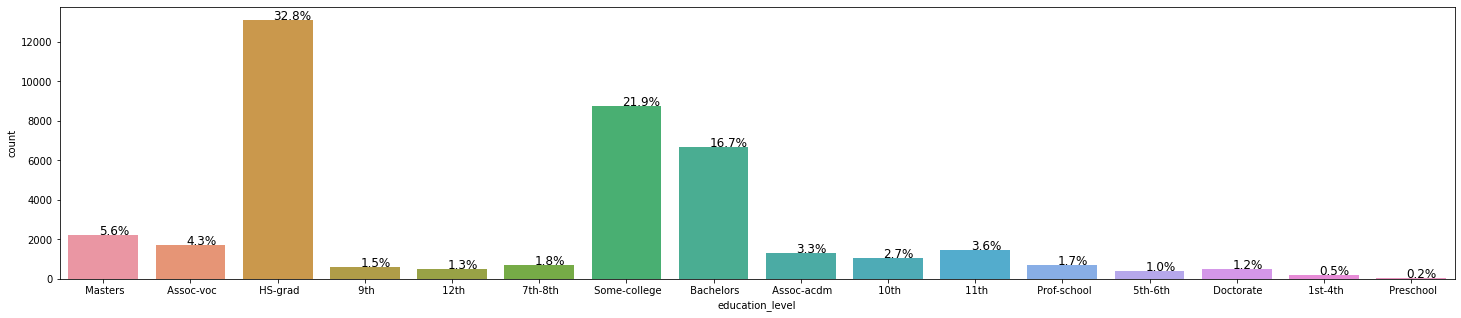

In [12]:
#Plotting the distribution of educ_level and mentioning percentages
plt.figure(figsize=(25,5))
ax = sns.countplot(data=df,x='education_level')
without_hue(ax, df['education_level'])

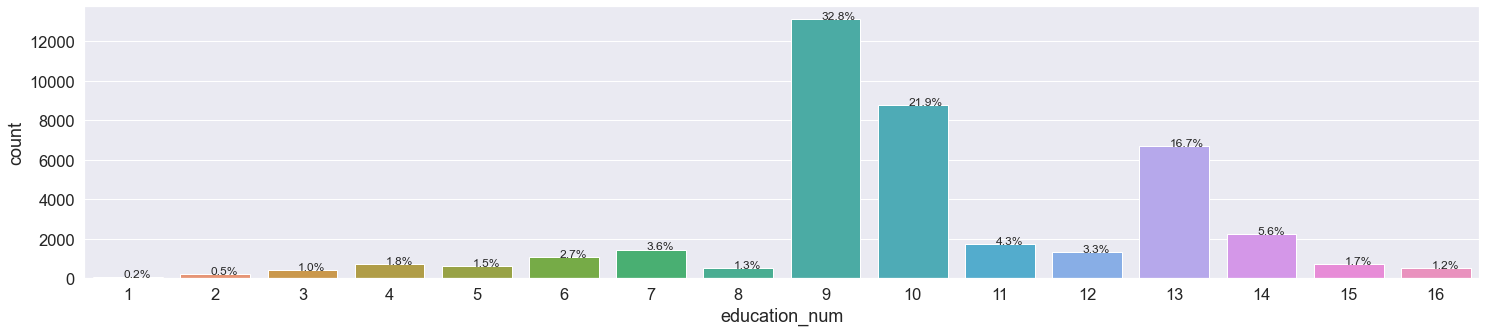

In [136]:
# Checking the distribution of education num
plt.figure(figsize=(25,5))
ax = sns.countplot(data=df,x='education_num')
without_hue(ax, df['education_num'])

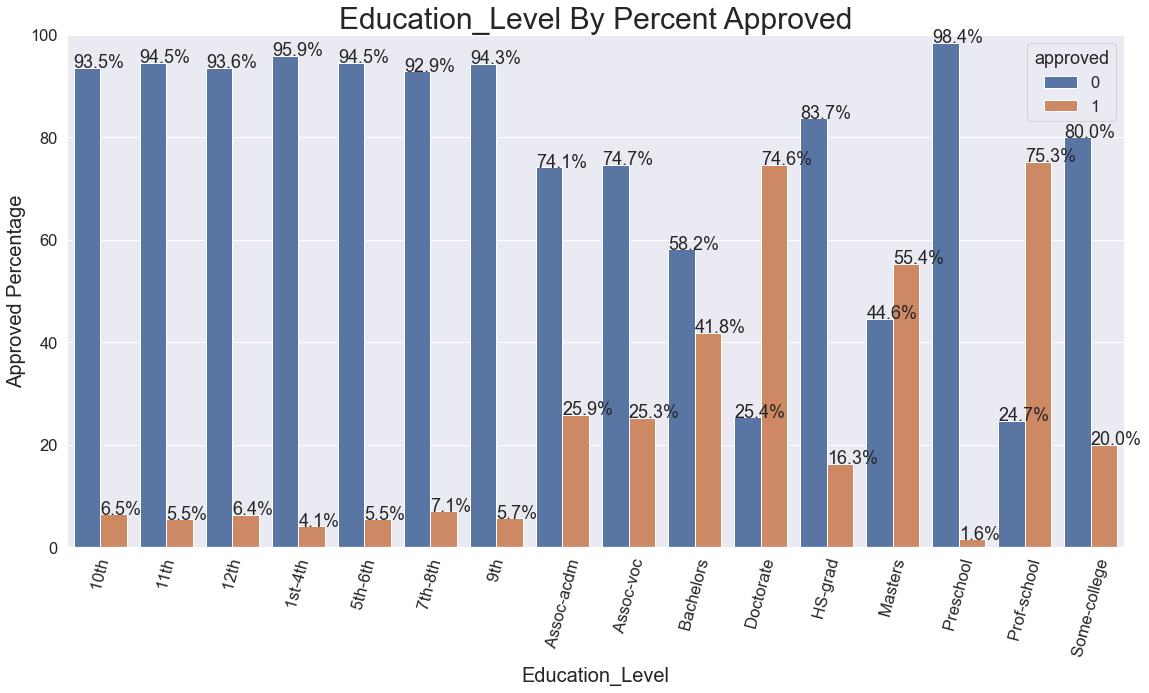

In [13]:
# Checking distribution of approval rate
plotting_percentages_sbn(df,'education_level','approved')


In [14]:
# Checking distribution of approval rate
plotting_percentages_plotly(df,'education_num','approved')

In [20]:
# Check education group with relationship
# i.e. checking if education amongst female affects relationship
df_edu = df[df['gender']==' Female']
pd.crosstab(df_edu['edu_group'],df_edu['relationship']).apply(lambda r: r/r.sum()*100, axis=1)

relationship   Husband   Not-in-family   Other-relative   Own-child  \
edu_group                                                             
pre           0.000000       38.805970        13.432836   13.432836   
matri         0.000000       28.917197         6.751592   18.089172   
hs            0.000000       20.700152         4.718417   44.444444   
diplo         0.013472       34.433517         4.661188   21.446854   
asso          0.000000       36.708861         2.622061   15.009042   
grad          0.000000       47.201946         2.968370   16.301703   
pg            0.000000       51.830986         1.408451    5.633803   
phd           0.000000       53.051643         2.347418    2.816901   

relationship   Unmarried       Wife  
edu_group                            
pre            23.880597  10.447761  
matri          33.757962  12.484076  
hs             22.983257   7.153729  
diplo          26.754681  12.690287  
asso           29.475588  16.184448  
grad           15.571776  17.956204  
pg             20.281690  20.845070  
phd            15.023474  26.760563

In [19]:
# Check education group with relationship
df_edu = df[df['gender']==' Male']
pd.crosstab(df_edu['edu_group'],df_edu['relationship']).apply(lambda r: r/r.sum()*100, axis=1)

relationship    Husband   Not-in-family   Other-relative   Own-child  \
edu_group                                                              
pre           54.404145       29.015544         6.735751    3.108808   
matri         60.100000       17.250000         5.900000   11.600000   
hs            41.980046       17.037606         5.065234   31.005372   
diplo         58.844291       19.916955         2.643599   14.477509   
asso          64.097258       22.452147         0.982928    8.484221   
grad          66.118207       23.468283         1.125785    6.971206   
pg            73.801707       21.339462         0.328299    2.101116   
phd           79.209979       16.320166         0.519751    1.247401   

relationship   Unmarried     Wife  
edu_group                          
pre             6.735751  0.00000  
matri           5.150000  0.00000  
hs              4.911742  0.00000  
diplo           4.117647  0.00000  
asso            3.983445  0.00000  
grad            2.294869  0.02165  
pg              2.429416  0.00000  
phd             2.702703  0.00000

In [140]:
# Check education group with mar_st
df_edu = df[df['gender']==' Female']
pd.crosstab(df_edu['edu_group'],df_edu['marital_status']).apply(lambda r: r/r.sum()*100, axis=1)

marital_status   Divorced   Married-AF-spouse   Married-civ-spouse  \
edu_group                                                            
pre             11.940299            0.000000            13.432836   
matri           22.420382            0.127389            14.012739   
hs              16.742770            0.000000             7.762557   
diplo           27.818941            0.148188            13.619830   
asso            32.820976            0.180832            16.907776   
grad            19.270073            0.194647            18.345499   
pg              28.591549            0.000000            21.267606   
phd             23.474178            0.938967            26.291080   

marital_status   Married-spouse-absent   Never-married   Separated    Widowed  
edu_group                                                                      
pre                           5.970149       38.805970    8.955224  20.895522  
matri                         3.312102       32.356688   11.592357  16.178344  
hs                            1.217656       61.035008    6.240487   7.001522  
diplo                         1.886030       42.624276    6.452917   7.449818  
asso                          1.265823       37.160940    5.696203   5.967450  
grad                          1.897810       54.209246    2.822384   3.260341  
pg                            1.830986       40.281690    2.535211   5.492958  
phd                           0.938967       40.375587    3.755869   4.225352

In [141]:
# Check education group with mar_st
df_edu = df[df['gender']==' Male']
pd.crosstab(df_edu['edu_group'],df_edu['marital_status']).apply(lambda r: r/r.sum()*100, axis=1)

marital_status   Divorced   Married-AF-spouse   Married-civ-spouse  \
edu_group                                                            
pre              4.145078            0.000000            57.512953   
matri            6.750000            0.000000            60.900000   
hs               7.137375            0.000000            43.745203   
diplo            8.961938            0.048443            59.384083   
asso             9.725815            0.051733            64.407656   
grad             6.581511            0.021650            66.637800   
pg               7.616546            0.000000            74.130007   
phd              6.548857            0.000000            79.313929   

marital_status   Married-spouse-absent   Never-married   Separated   Widowed  
edu_group                                                                     
pre                           7.772021       24.352332    2.590674  3.626943  
matri                         2.100000       26.150000    2.800000  1.300000  
hs                            1.458173       44.512663    2.455871  0.690714  
diplo                         0.782007       27.965398    2.027682  0.830450  
asso                          0.724263       23.072944    1.707191  0.310398  
grad                          0.736090       24.334271    1.147435  0.541243  
pg                            0.459619       16.086671    1.116218  0.590939  
phd                           1.039501       11.122661    1.039501  0.935551

## Workclass
1. Checking if can be grouped
2. Checking if particular category affects the output variable more

* Max employees are from private firms
* Almost negligiible without pay
* Equal no work in federal and state and slightly higher in local govt
* Approval rate is very high for self employed inc
* Federal govt employees also have high approval rate as compared to local and state govt
* Approval rates of local, state govts and self employed not inc are almost equal





In [184]:
df.columns

Index(['gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'address',
       'email', 'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type', 'Age', 'zipcode',
       'state'],
      dtype='object')

In [225]:
df['approved'].groupby(df['workclass']).value_counts()

workclass          approved
 Federal-gov       0             753
                   1             491
 Local-gov         0            1932
                   1             810
 Private           0           23125
                   1            6361
 Self-emp-inc      1             815
                   0             651
 Self-emp-not-inc  0            2414
                   1             933
 State-gov         0            1233
                   1             462
 Without-pay       0              17
                   1               2
Name: approved, dtype: int64

In [186]:
df['workclass'].value_counts()

 Private             29486
 Self-emp-not-inc     3347
 Local-gov            2742
 State-gov            1695
 Self-emp-inc         1466
 Federal-gov          1244
 Without-pay            19
Name: workclass, dtype: int64

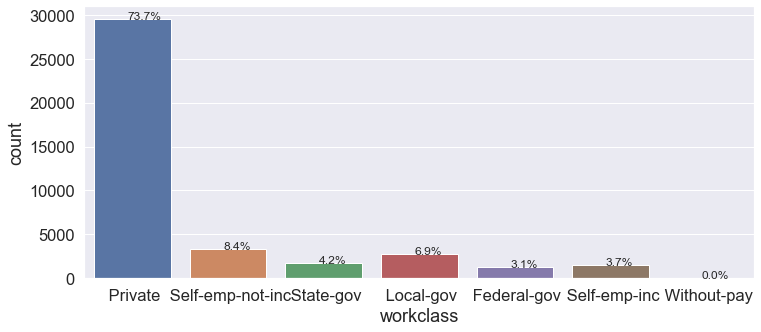

In [203]:
#Checking distribution of workclass
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df,x='workclass')
without_hue(ax, df['workclass'])

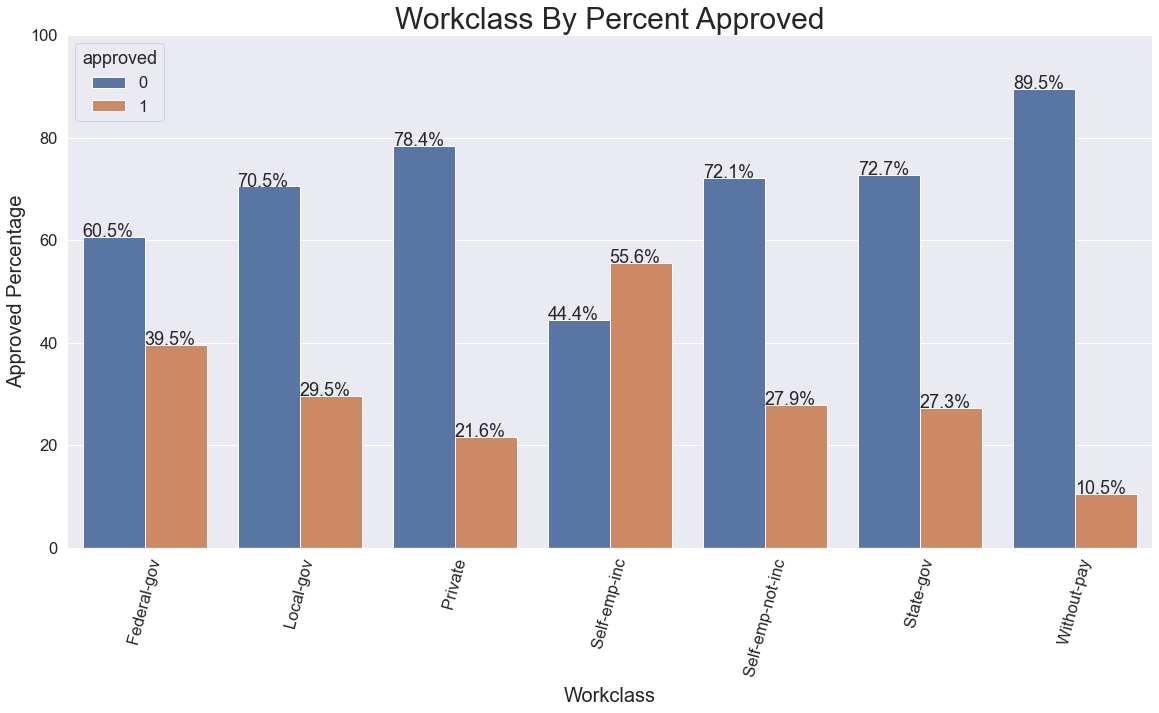

In [187]:
#Plotting workclass
plotting_percentages_sbn(df,'workclass','approved')

## Capital gain and capital loss

In [228]:
df.columns

Index(['gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'address',
       'email', 'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type', 'Age', 'zipcode',
       'state'],
      dtype='object')

In [240]:
df['capital_gain'].describe()

count    39999.000000
mean      1082.573064
std       7420.867706
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [22]:
fig = px.scatter(x=df.index,y=(df['capital_gain']),color =df['approved'])
fig.show()

In [23]:
fig = px.scatter(x=df.index,y=(df['capital_loss']),color =df['approved'])
fig.show()

/Users/dhirajhasija/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:949: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/dhirajhasija/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:992: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/dhirajhasija/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:949: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/dhirajhasija/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:992: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Text(0, 0.5, 'Probability Density')

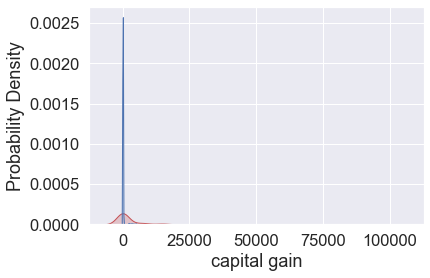

In [318]:
sns.kdeplot(df.loc[(df['approved']==1),
            'capital_gain'], color='r', shade=True, Label='Iris_Setosa')
  
sns.kdeplot(df.loc[(df['approved']==0), 
            'capital_gain'], color='b', shade=True, Label='Iris_Virginica')
  
plt.xlabel('capital gain')
plt.ylabel('Probability Density')

<Figure size 1800x720 with 0 Axes>

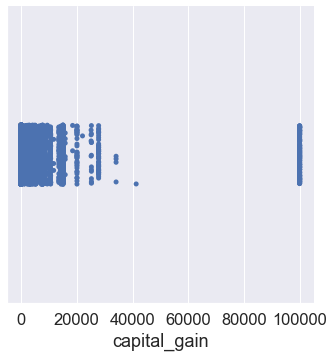

In [242]:
#Checking distribution of workclass]
plt.figure(figsize=(25,10))
ax = sns.catplot(data=df,x='capital_gain')
#without_hue(ax, df['capital_gain'])

<Figure size 1800x720 with 0 Axes>

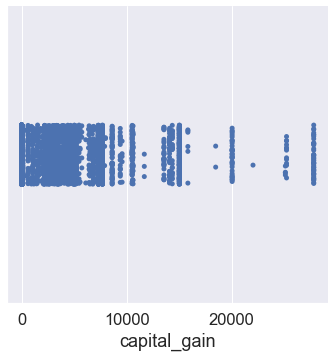

In [251]:
capital_df = df[df['capital_gain'] < 31000]
plt.figure(figsize=(25,10))
ax = sns.catplot(data=capital_df,x='capital_gain')

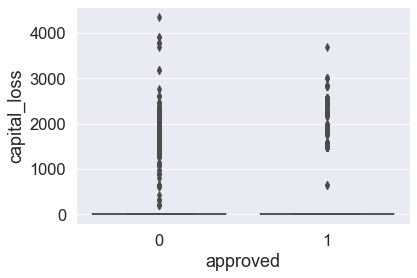

In [252]:
 ax = sns.boxplot(x="approved", y="capital_loss", data=capital_df)


<AxesSubplot:xlabel='education_level', ylabel='capital_gain'>

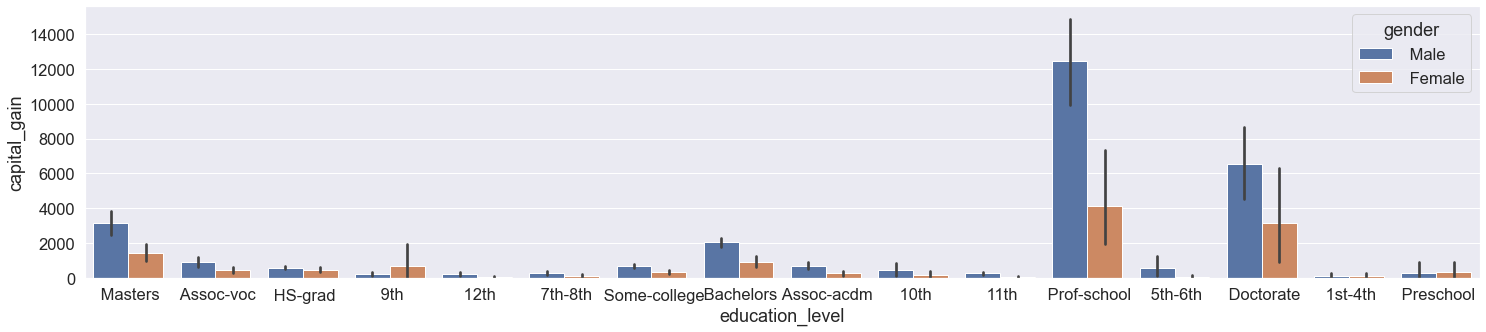

In [157]:
plt.figure(figsize=(25,5))
sns.barplot(x='education_level',y='capital_gain',hue='gender', data=df)

<AxesSubplot:xlabel='education_level', ylabel='capital_loss'>

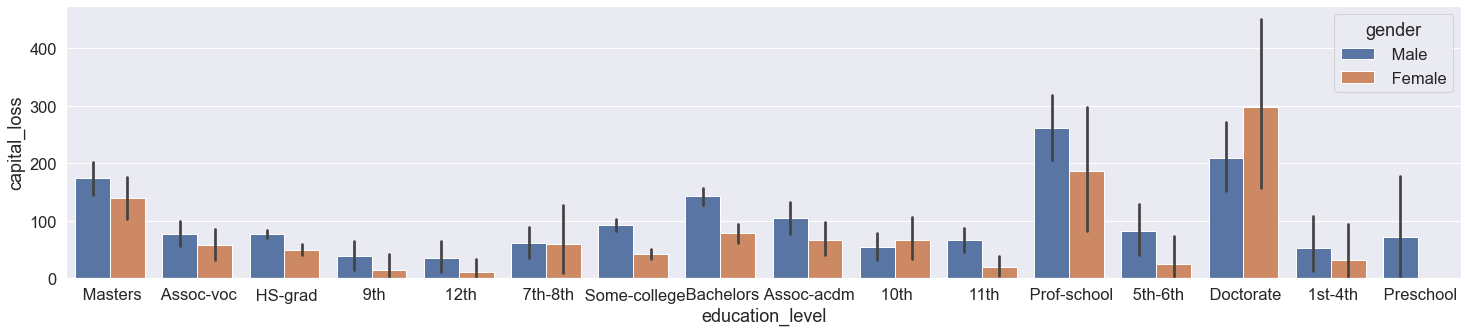

In [158]:
plt.figure(figsize=(25,5))
sns.barplot(x='education_level',y='capital_loss',hue='gender', data=df)

# Checking marital status and relationship status

* Relationship are marital status don't seem to have incorrect data
https://www.census.gov/programs-surveys/cps/technical-documentation/subject-definitions.html
<br> Relationship is w.r.t other person in household

### Relationship
* For the ones residing with spouse, have maximum approval rate.
* Not in family and unmarried can be grouped together
* As child refers to dependent, usually after 18 children are on their own so as these refer dependent, credability decreases
* Details about wife and other relative is very less

### Marital status
* Data is only given about Married-civ-data, Divorced, Never-married, Rest can be clubbed together
* Married-civ-spouse have significant higher approval as compared to divorced, never married and others

In [253]:
df['marital_status'].value_counts()

 Married-civ-spouse       18647
 Never-married            12855
 Divorced                  5573
 Separated                 1263
 Widowed                   1132
 Married-spouse-absent      500
 Married-AF-spouse           29
Name: marital_status, dtype: int64

In [255]:
df['relationship'].groupby(df['marital_status']).value_counts()

marital_status          relationship   
 Divorced                Not-in-family      3032
                         Unmarried          2018
                         Own-child           377
                         Other-relative      146
 Married-AF-spouse       Wife                 18
                         Husband               9
                         Other-relative        1
                         Own-child             1
 Married-civ-spouse      Husband           16528
                         Wife               1830
                         Other-relative      162
                         Own-child           111
                         Not-in-family        16
 Married-spouse-absent   Not-in-family       252
                         Unmarried           156
                         Own-child            51
                         Other-relative       41
 Never-married           Not-in-family      5873
                         Own-child          5167
                         Unma

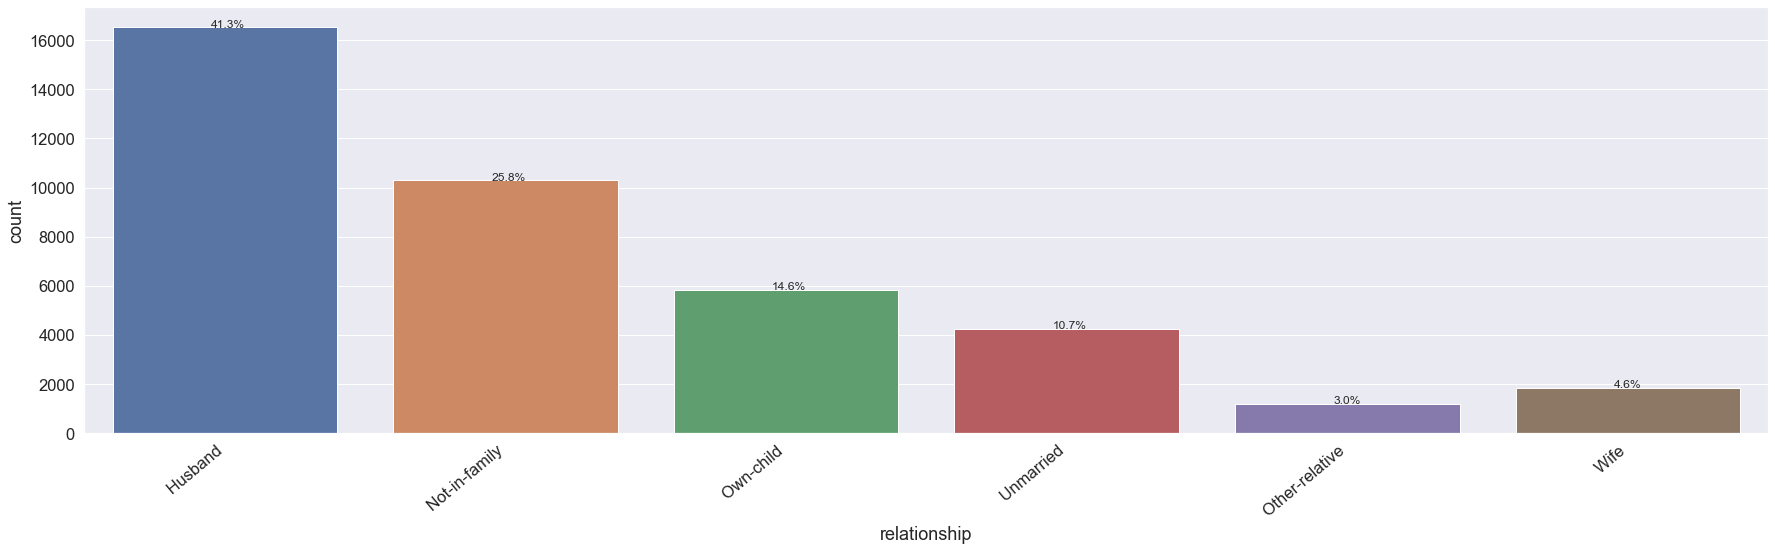

In [280]:
plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='relationship')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['relationship'])

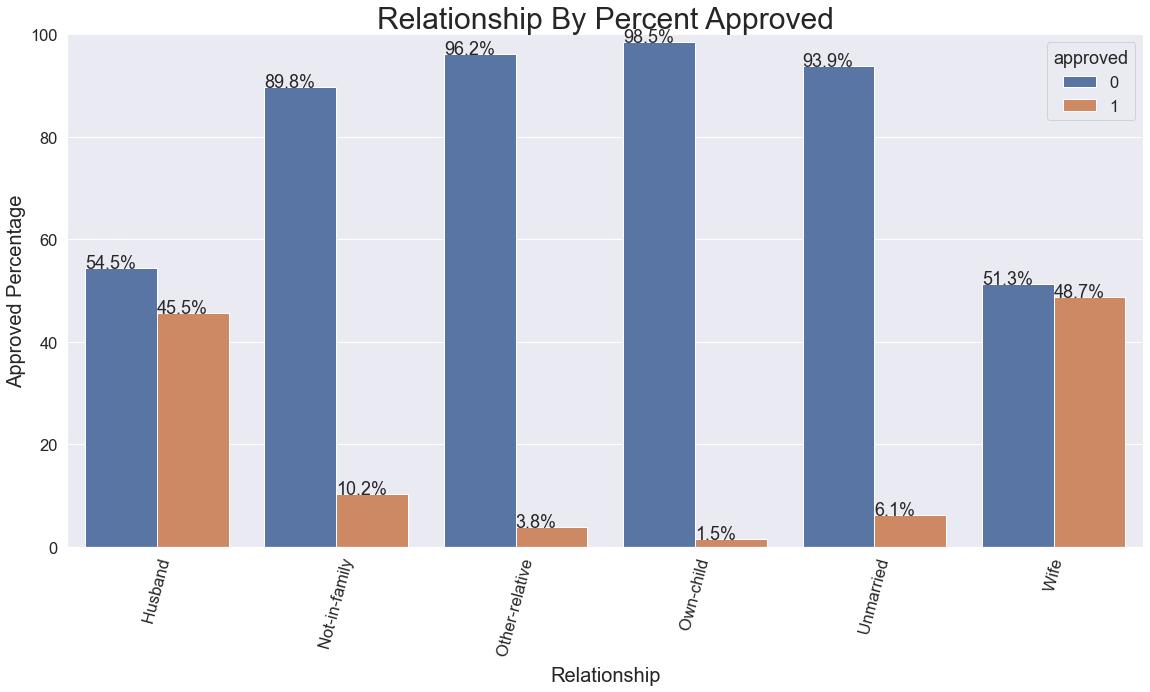

In [277]:
plotting_percentages_sbn(df,'relationship','approved')

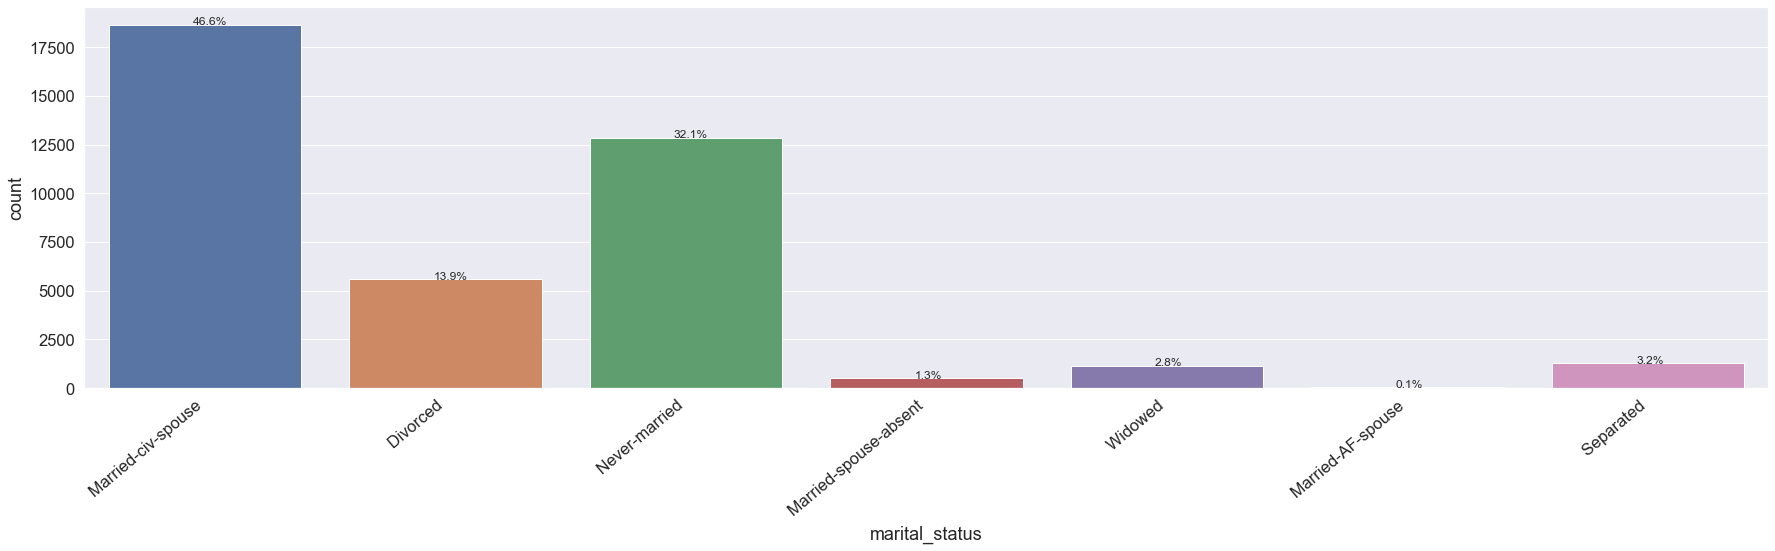

In [279]:


plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='marital_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['marital_status'])



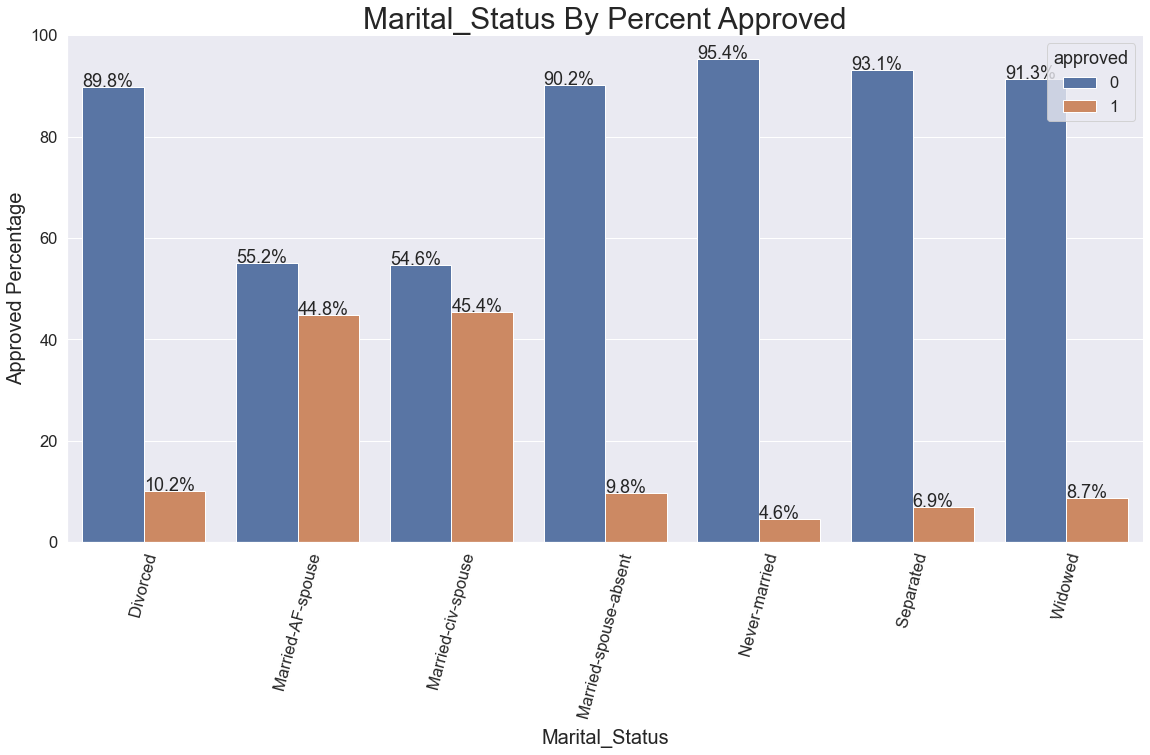

In [278]:
plotting_percentages_sbn(df,'marital_status','approved')



In [70]:
# Check for husband and wife who have not got
df_temp_rel = df[(df['relationship']==' Husband')]

posx and posy should be finite values
posx and posy should be finite values


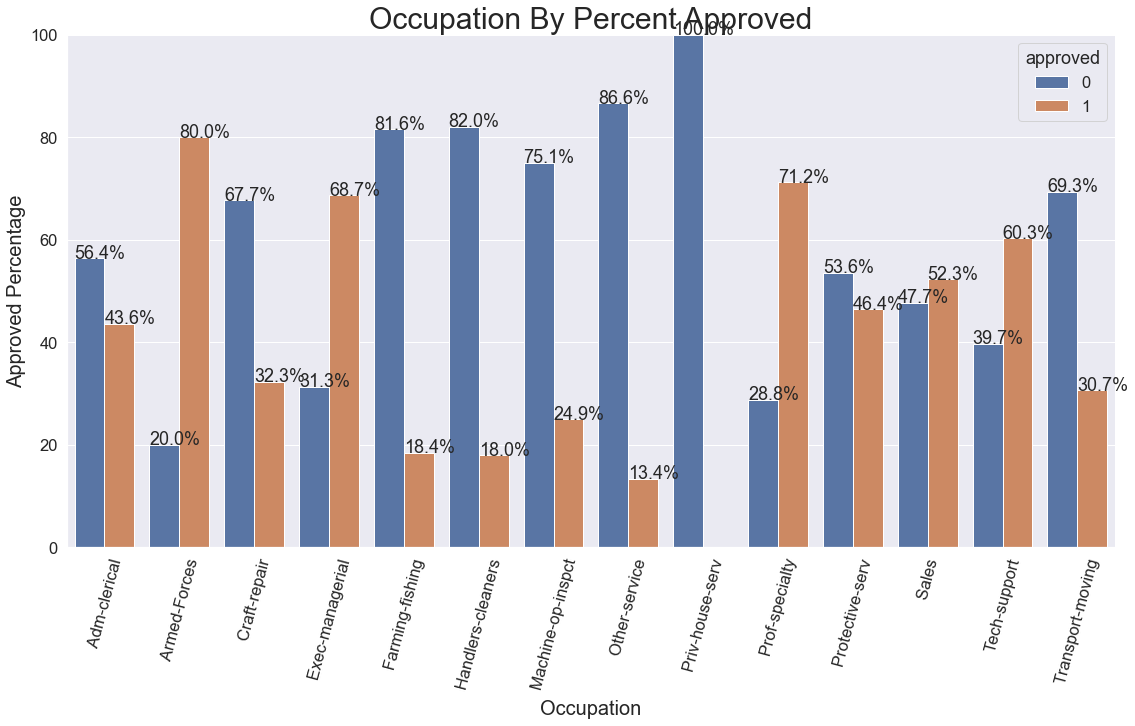

In [71]:
# plot of occupation for sample with relationship husband to compare why they didnt
plotting_percentages_sbn(df_temp_rel, 'occupation', 'approved')

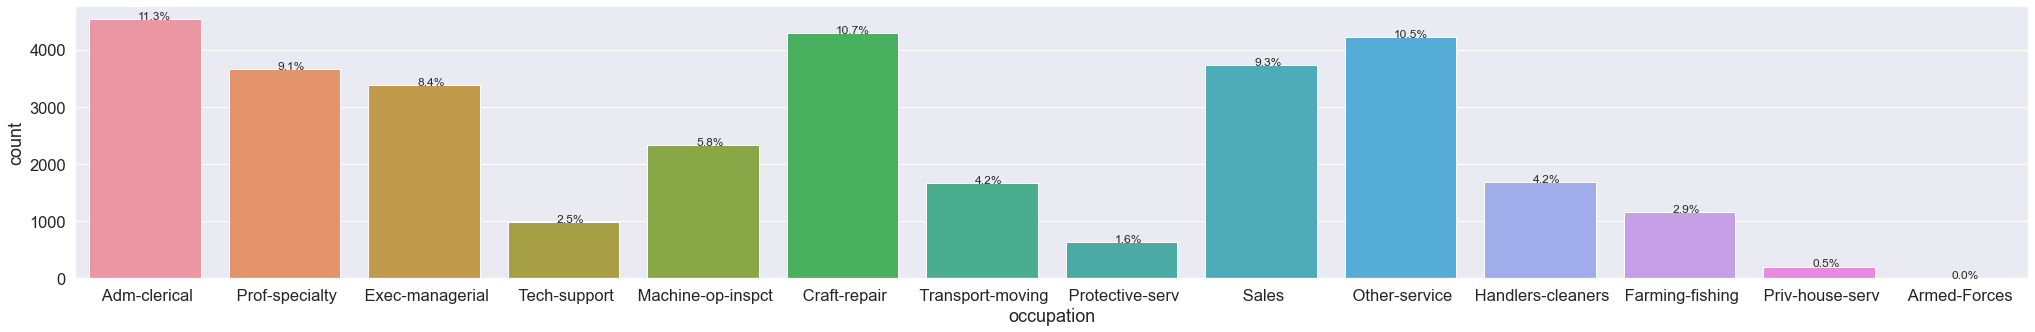

In [73]:
df_temp_rel = df[((df['relationship']==' Husband') & df['approved']==0)]
plt.figure(figsize=(35,5))
ax = sns.countplot(data=df_temp_rel,x='occupation')
without_hue(ax, df['occupation'])

<Figure size 2520x648 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


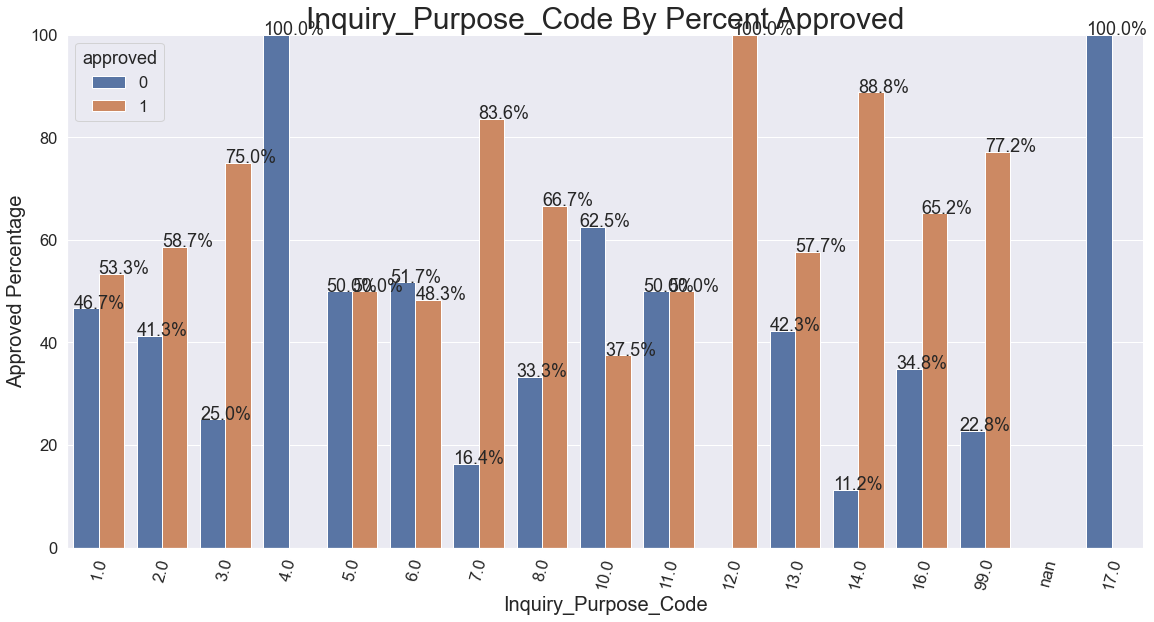

In [85]:
df_temp_rel = df[((df['relationship']==' Husband') & ((df['occupation']==' Exec-managerial') | (df['occupation']== 'Prof-speciality')))]
plt.figure(figsize=(35,9))
plotting_percentages_sbn(df_temp_rel, 'inquiry_purpose_code', 'approved')

In [87]:
df_temp_rel['approved'].groupby(df['inquiry_purpose_code']).value_counts()

inquiry_purpose_code  approved
1.0                   1             8
                      0             7
2.0                   1            81
                      0            57
3.0                   1             3
                      0             1
4.0                   0             1
5.0                   0             6
                      1             6
6.0                   0            15
                      1            14
7.0                   1           445
                      0            87
8.0                   1             6
                      0             3
10.0                  0             5
                      1             3
11.0                  0             1
                      1             1
12.0                  1             1
13.0                  1           616
                      0           452
14.0                  1            87
                      0            11
16.0                  1           116
                   

<Figure size 2520x648 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


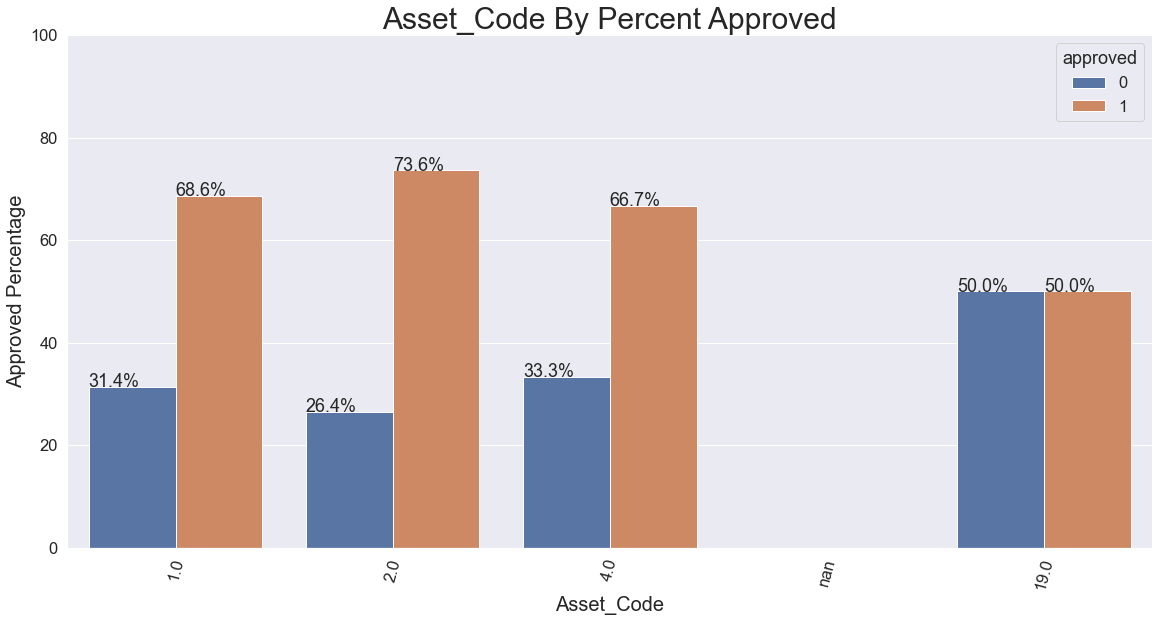

In [91]:
plt.figure(figsize=(35,9))
plotting_percentages_sbn(df_temp_rel, 'asset_code', 'approved')

## OCCUPATION

### Grouping can be done considering the following

* Exec manager, Prof specciality jobs which are highly paid have higher approval rate
* Protective service, sales, tech-support, transport have moderate approval rate
* Cleaners, clerical, craft-repair, Machine-op-inspec, farm-fishing have a very low approval rate
* Priv-house-service, Armed-forces has very less data so considering the approval rate of those might not be accurate
* Other service has a very high rejection rate



In [256]:
df['occupation'].value_counts()

 Craft-repair         5354
 Prof-specialty       5309
 Exec-managerial      5291
 Adm-clerical         4885
 Sales                4753
 Other-service        4303
 Machine-op-inspct    2623
 Transport-moving     2047
 Handlers-cleaners    1793
 Farming-fishing      1294
 Tech-support         1270
 Protective-serv       862
 Priv-house-serv       203
 Armed-Forces           12
Name: occupation, dtype: int64

In [257]:
df['approved'].groupby(df['workclass']).value_counts()

workclass          approved
 Federal-gov       0             753
                   1             491
 Local-gov         0            1932
                   1             810
 Private           0           23125
                   1            6361
 Self-emp-inc      1             815
                   0             651
 Self-emp-not-inc  0            2414
                   1             933
 State-gov         0            1233
                   1             462
 Without-pay       0              17
                   1               2
Name: approved, dtype: int64

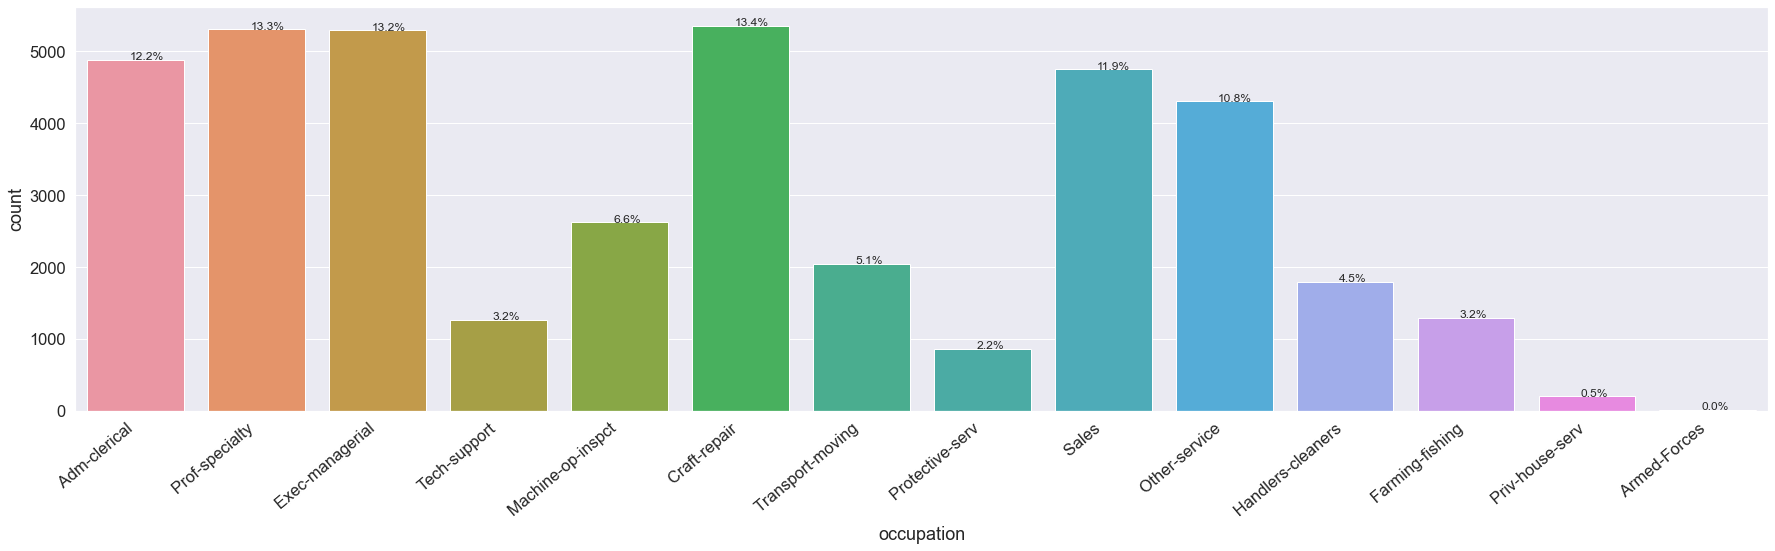

In [263]:
plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='occupation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['occupation'])



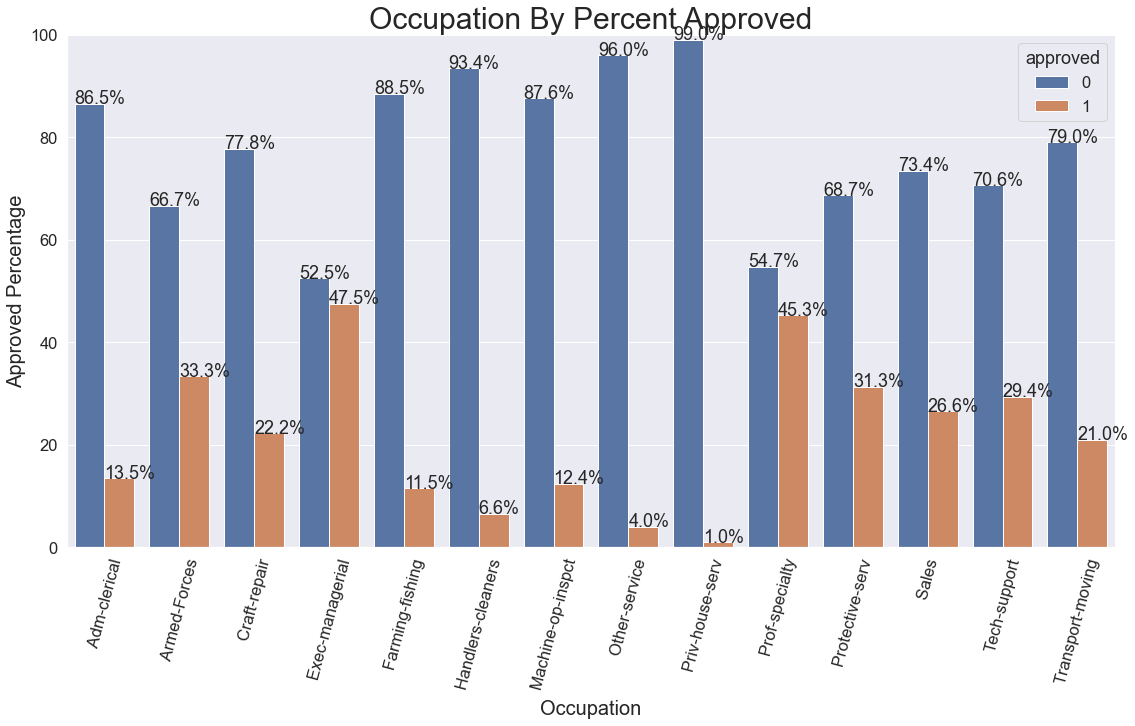

In [276]:
plotting_percentages_sbn(df,'occupation','approved')


## Hours per week


* Majority i.e. 50% of the people work for 35-40 hours per week, total range beinf 0-99
*  Max approval rate is for peole working 40-45 hours
* Men work more then women
* Working does affect approval rate

In [319]:
df.isna().sum()

gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
address                     0
email                       0
inquiry_purpose_code     1129
institute_type              0
account_type                0
asset_class_cd          31636
asset_code                 74
portfolio_type              5
Age                         0
zipcode                     0
state                       0
dtype: int64

In [322]:
df['hours_per_week'].groupby(df['approved']).value_counts()

approved  hours_per_week
0         40                14762
          50                 2002
          45                 1439
          35                 1336
          20                 1325
                            ...  
1         73                    1
          74                    1
          92                    1
          95                    1
          96                    1
Name: hours_per_week, Length: 177, dtype: int64

In [14]:
df['hours_group'] = pd.cut(df.hours_per_week,bins=[0,10,20,30,35,40,45,50,55,60,70,99], labels=['0-10','10-20','20-30','30-35','35-40','40-45','45-50','50-55','55-60','60-70','70-99'])

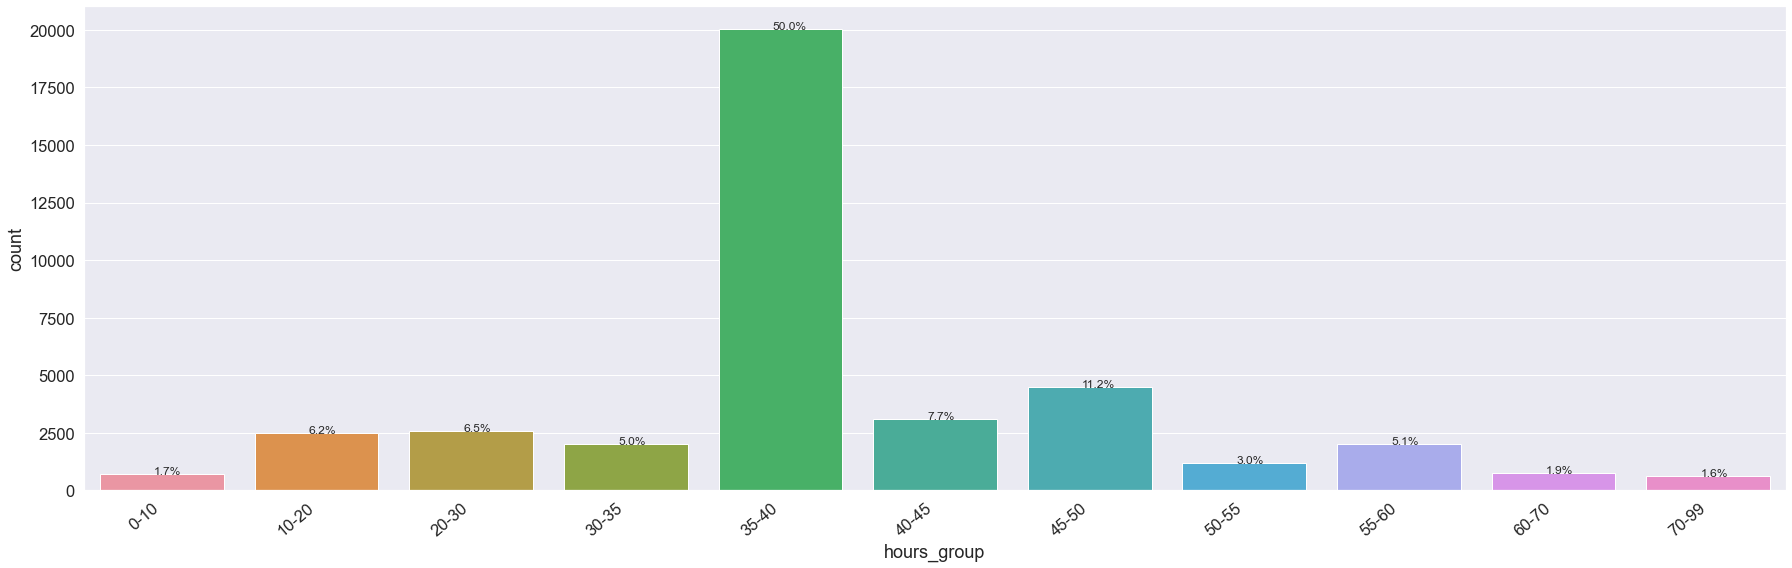

In [342]:
plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='hours_group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['hours_group'])



In [412]:
plotting_percentages_plotly(df,'hours_group','occupation')

In [1]:
plotting_percentages_plotly(df,'hours_group','approved')

NameError: name 'plotting_percentages_plotly' is not defined

In [144]:
pd.crosstab(df['gender'],df['hours_group']).apply(lambda r: r/r.sum()*100, axis=1)

hours_group      0-10      10-20      20-30     30-35      35-40     40-45  \
gender                                                                       
 Female      2.834972  10.295022  10.225876  7.913337  51.651813  5.431776   
 Male        1.219286   4.258237   4.628840  3.613386  49.268058  8.864841   

hours_group      45-50     50-55     55-60     60-70     70-99  
gender                                                          
 Female       6.015673  1.574985  2.350953  0.937308  0.768285  
 Male        13.764222  3.657859  6.352148  2.375570  1.997554

In [146]:
pd.crosstab(df['marital_status'],df['hours_group']).apply(lambda r: r/r.sum()*100, axis=1)

hours_group                 0-10      10-20      20-30     30-35      35-40  \
marital_status                                                                
 Divorced               0.951014   3.570788   5.275435  5.634308  56.468688   
 Married-AF-spouse      3.448276   3.448276  10.344828  3.448276  51.724138   
 Married-civ-spouse     1.045745   2.922722   3.480453  3.308843  49.284067   
 Married-spouse-absent  1.400000   7.000000   6.400000  6.200000  56.600000   
 Never-married          2.823804  11.707507  10.665111  6.542201  47.763516   
 Separated              0.950119   3.958828   7.680127  8.155186  58.669834   
 Widowed                5.918728  13.604240  11.837456  8.657244  44.257951   

hours_group                40-45      45-50     50-55      55-60     60-70  \
marital_status                                                               
 Divorced               7.590167  10.353490  2.673605   4.342365  1.794366   
 Married-AF-spouse      6.896552   3.448276  3.448276  10.344828  0.000000   
 Married-civ-spouse     9.406339  14.726229  4.022095   7.030622  2.531238   
 Married-spouse-absent  5.800000   7.000000  2.200000   4.200000  1.400000   
 Never-married          5.935434   7.755737  1.828082   2.924932  1.174640   
 Separated              6.413302   6.413302  2.058591   3.404592  1.425178   
 Widowed                4.151943   5.300353  1.766784   2.120141  1.325088   

hours_group                70-99  
marital_status                    
 Divorced               1.345774  
 Married-AF-spouse      3.448276  
 Married-civ-spouse     2.241647  
 Married-spouse-absent  1.800000  
 Never-married          0.879035  
 Separated              0.870942  
 Widowed                1.060071

In [148]:
pd.crosstab(df['asset_code'],df['hours_group']).apply(lambda r: r/r.sum()*100, axis=1)

hours_group      0-10      10-20     20-30     30-35      35-40      40-45  \
asset_code                                                                   
1.0          1.759151   6.198422  6.446773  5.005821  50.040098   7.740266   
2.0          1.636189   6.641001  6.063523  5.197305  50.529355   8.084697   
4.0          0.568182  10.795455  9.659091  5.113636  46.590909   5.681818   
19.0         0.000000   1.818182  7.272727  3.636364  47.272727  16.363636   

hours_group      45-50     50-55     55-60     60-70     70-99  
asset_code                                                      
1.0          11.284439  2.967275  5.044626  1.919545  1.593584  
2.0          10.298364  3.272377  5.197305  1.251203  1.828681  
4.0           8.522727  4.545455  5.681818  1.704545  1.136364  
19.0         12.727273  0.000000  7.272727  1.818182  1.818182

## Institute type

1. PVT: private
1. NBF: non bank finance
1. HFC: Housing financial companies
1. BRO: Delivery order bank
1. COB: Millitary account
1. TEL: Telephone banking
1. SRC: Online banking
1. PUB: Public sector
1. FOR: Foreign
1. INS: 

* Majority of people belong to PVT

In [356]:
df['institute_type'].value_counts()


PVT    23597
NBF    14079
PUB     1081
HFC      794
BRO      273
FOR      100
INS       34
COB       33
SRC        4
TEL        4
Name: institute_type, dtype: int64

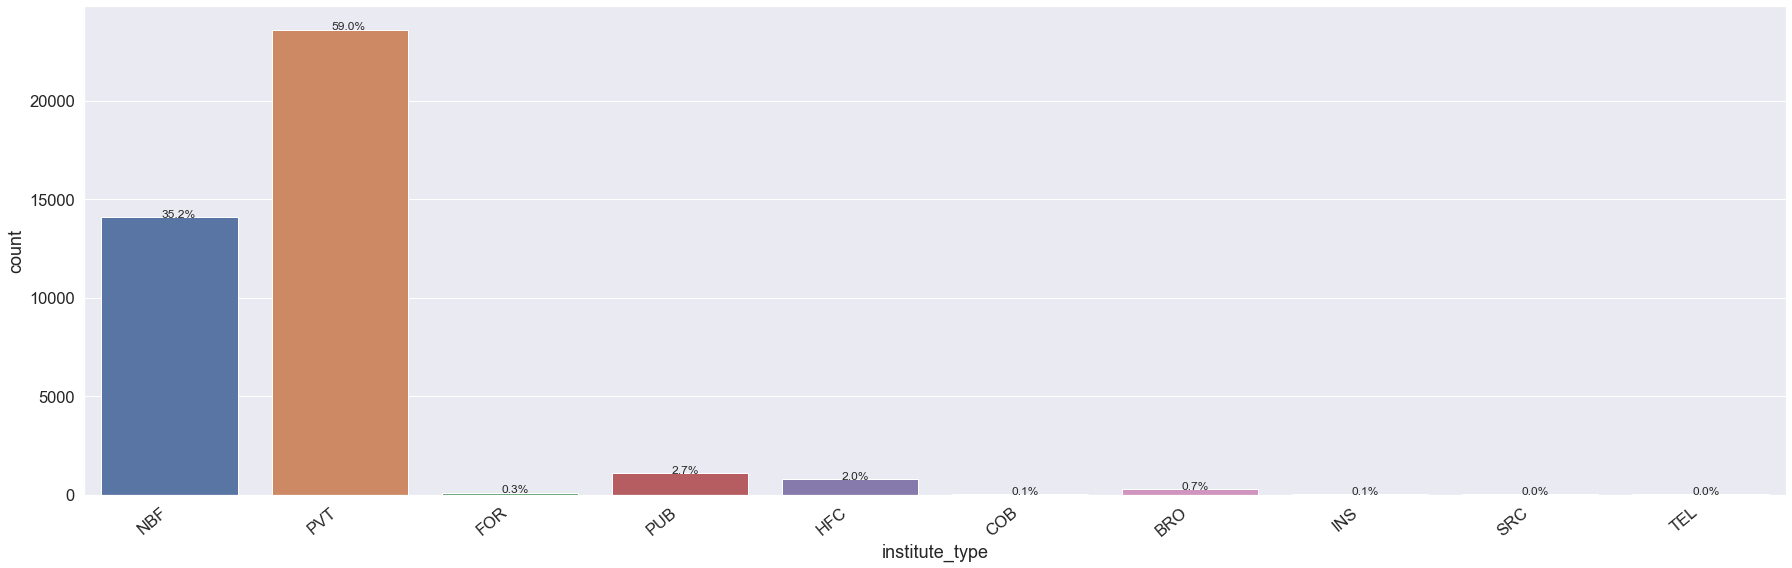

In [361]:
plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='institute_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['institute_type'])

In [149]:
plotting_percentages_plotly(df,'institute_type','approved')

## Inquiry purpose code: NA present

Purpose of inquiry from the bureau
Data dictionary has 20 values
1. Agriculture Loan
2. Auto Loan
3. Business Loan
4. Commercial Vehicle Loans: 
5. Construction Euipment Loans
6. Consumer Search
7. <b> Credit Card: </b>
8. Education Loan
9. Leasing
10. Load Against Collateral 
11. Microfinance 
12. Non-funded credit facility 
13. Personal Loan
14. Property Loan
15. Telecom <b> NOT PRESENT </b>
16. Two/Three wheeler loan: 
17. Working capital loan 
18. Consumer loan
19. Credit Review <b> NOT PRESENT </b>
<br>99.  Others

In [432]:
df['institute_type'].value_counts()

PVT    23597
NBF    14079
PUB     1081
HFC      794
BRO      273
FOR      100
INS       34
COB       33
SRC        4
TEL        4
Name: institute_type, dtype: int64

In [446]:
df[df['inquiry_purpose_code'].isna()]

gender date_of_birth          workclass education_level  \
46        Male    02/01/1989            Private       Bachelors   
52        Male    09/01/1964            Private    Some-college   
71        Male    01/01/1996          State-gov         HS-grad   
74        Male    04/01/1983            Private       Assoc-voc   
75      Female    01/01/1995            Private         HS-grad   
...        ...           ...                ...             ...   
39808     Male    07/01/1970            Private         HS-grad   
39830   Female    04/01/1983          Local-gov       Doctorate   
39834   Female    04/01/1984   Self-emp-not-inc         HS-grad   
39857     Male    08/01/1967          Local-gov         Masters   
39926     Male    06/01/1976            Private         HS-grad   

       education_num       marital_status          occupation    relationship  \
46                13   Married-civ-spouse               Sales         Husband   
52                10   Married-civ-spouse    Transport-moving         Husband   
71                 9   Married-civ-spouse     Protective-serv         Husband   
74                11             Divorced               Sales   Not-in-family   
75                 9        Never-married     Exec-managerial       Own-child   
...              ...                  ...                 ...             ...   
39808              9   Married-civ-spouse   Machine-op-inspct         Husband   
39830             16             Divorced      Prof-specialty   Not-in-family   
39834              9   Married-civ-spouse       Other-service            Wife   
39857             14   Married-civ-spouse     Exec-managerial         Husband   
39926              9   Married-civ-spouse        Craft-repair         Husband   

       capital_gain  capital_loss  ...  inquiry_purpose_code  institute_type  \
46                0             0  ...                   NaN             PVT   
52                0             0  ...                   NaN             PVT   
71                0             0  ...                   NaN             PVT   
74                0             0  ...                   NaN             PVT   
75                0             0  ...                   NaN             PVT   
...             ...           ...  ...                   ...             ...   
39808             0             0  ...                   NaN             PVT   
39830             0             0  ...                   NaN             PVT   
39834             0             0  ...                   NaN             PVT   
39857          7688             0  ...                   NaN             PVT   
39926             0             0  ...                   NaN             PVT   

      account_type asset_class_cd  asset_code portfolio_type  Age zipcode  \
46               5            NaN         1.0              R   32   26431   
52               5            NaN         1.0              R   57   00767   
71             191              S         1.0              I   25   81742   
74               5            NaN         1.0              R   38   16701   
75               5            NaN         1.0              R   26   61795   
...            ...            ...         ...            ...  ...     ...   
39808            5            NaN         1.0              R   51   36883   
39830            5            NaN         1.0              R   38   29855   
39834           58              S         1.0              M   37   83101   
39857            5            NaN         1.0              R   54   62257   
39926          189            NaN         1.0              I   45   99755   

       state hours_group  
46        NV       45-50  
52        ME       30-35  
71        RI       35-40  
74        AE       40-45  
75        MN       35-40  
...      ...         ...  
39808     CT       45-50  
39830     VA       35-40  
39834     AE       10-20  
39857     OR       60-70  
39926     MT       35-40  

[1129 rows x 24 col

In [449]:
df[df['inquiry_purpose_code'].isna()]['Age'].groupby(df['institute_type']).count()
# Data is missing more for private so can be deleted
# Checked with gender, workclass, 
# With inquiry_purpose_code missing, max were rejected

institute_type
COB       1
NBF     115
PVT    1013
Name: Age, dtype: int64

In [489]:
df[df['inquiry_purpose_code'].isna()]['Age'].groupby(df['education_level']).count()

education_level
 10th             23
 11th             43
 12th             13
 1st-4th           3
 5th-6th          10
 7th-8th          22
 9th              19
 Assoc-acdm       30
 Assoc-voc        46
 Bachelors       183
 Doctorate        14
 HS-grad         396
 Masters          52
 Preschool         2
 Prof-school      14
 Some-college    259
Name: Age, dtype: int64

'inquiry_purpose_code' na 1129   Purpose of inquiry                    18 
'institute_type'                 type of institute req that inquiry    10  
'account_type'                   type of acc of customer under inquiry 37
'asset_class_cd'       na 31636  current state of assets of customer    8 COLUMN CAN BE DELETED
'asset_code'           na   74   type of ownership of customer          4
'portfolio_type'       na    5   type of portfolio                      4

## asset_class_cd

In [151]:
df['asset_class_cd'].value_counts()

S     7580
?      276
B      207
L      130
D       98
M       70
1        1
-1       1
Name: asset_class_cd, dtype: int64

## Account type

* 44 in dic, 37 in data

In [153]:
pd.crosstab(df['approved'], df['account_type']).apply(lambda r: r/r.sum()*100, axis=1)

account_type        5         47        58        121       123       130  \
approved                                                                    
0             57.374274  3.555187  2.101245  0.879668  6.160996  2.386722   
1             65.292688  2.126798  3.828236  0.435487  4.101681  1.964756   

account_type       167       168       170       172  ...       220       221  \
approved                                              ...                       
0             0.009959  0.006639  0.013278  0.172614  ...  0.006639  0.063071   
1             0.000000  0.000000  0.000000  0.081021  ...  0.000000  0.081021   

account_type       222       223       224       226       227       228  \
approved                                                                   
0             0.006639  0.013278  0.328631  0.049793  0.282158  0.026556   
1             0.000000  0.000000  0.020255  0.040510  0.030383  0.030383   

account_type       240       999  
approved                          
0             0.009959  1.925311  
1             0.050638  1.174803  

[2 rows x 37 columns]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


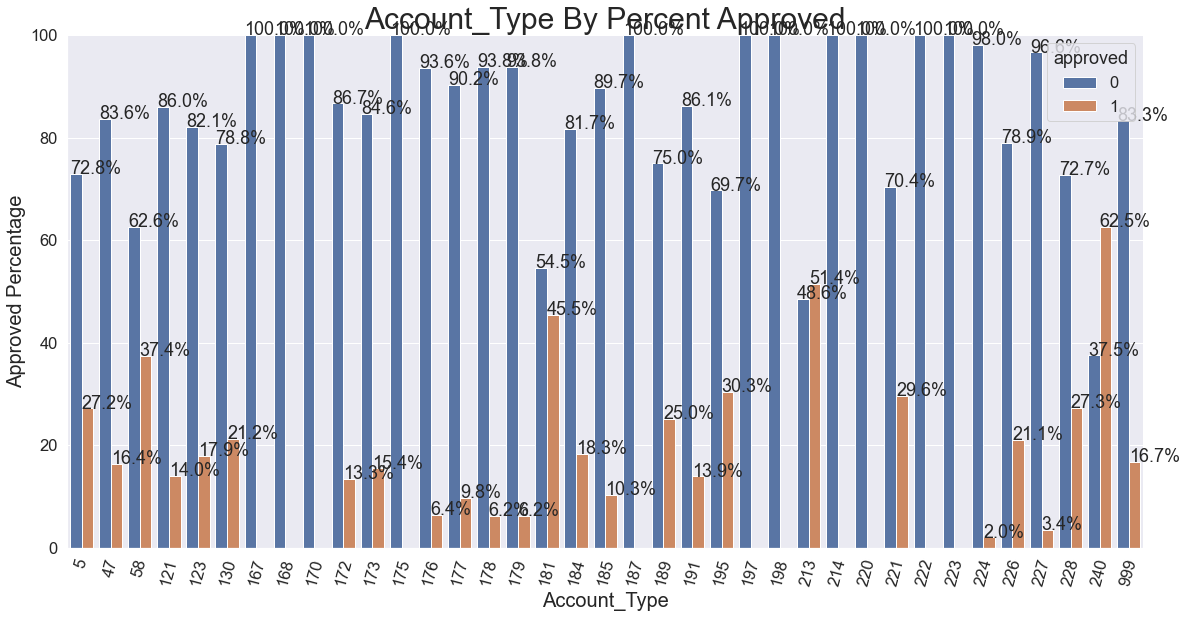

In [156]:
plotting_percentages_sbn(df,'account_type','approved')

In [154]:
df['account_type'].value_counts()

5      23731
189     6368
123     2261
47      1281
173     1250
191     1124
58      1011
130      913
999      696
121      308
184      153
178      145
177      123
176      109
224      101
227       88
195       66
172       60
213       35
179       32
185       29
221       27
226       19
181       11
228       11
187       10
240        8
175        4
197        4
170        4
223        4
198        3
167        3
220        2
168        2
222        2
214        1
Name: account_type, dtype: int64

## asset_code: NA present - 74

* 1,2,4,19 values present
* Authorised user has higher approval
* Gauranter has less because he has a dependency

In [350]:
df['asset_code'].value_counts()

1.0     38655
2.0      1039
4.0       176
19.0       55
Name: asset_code, dtype: int64

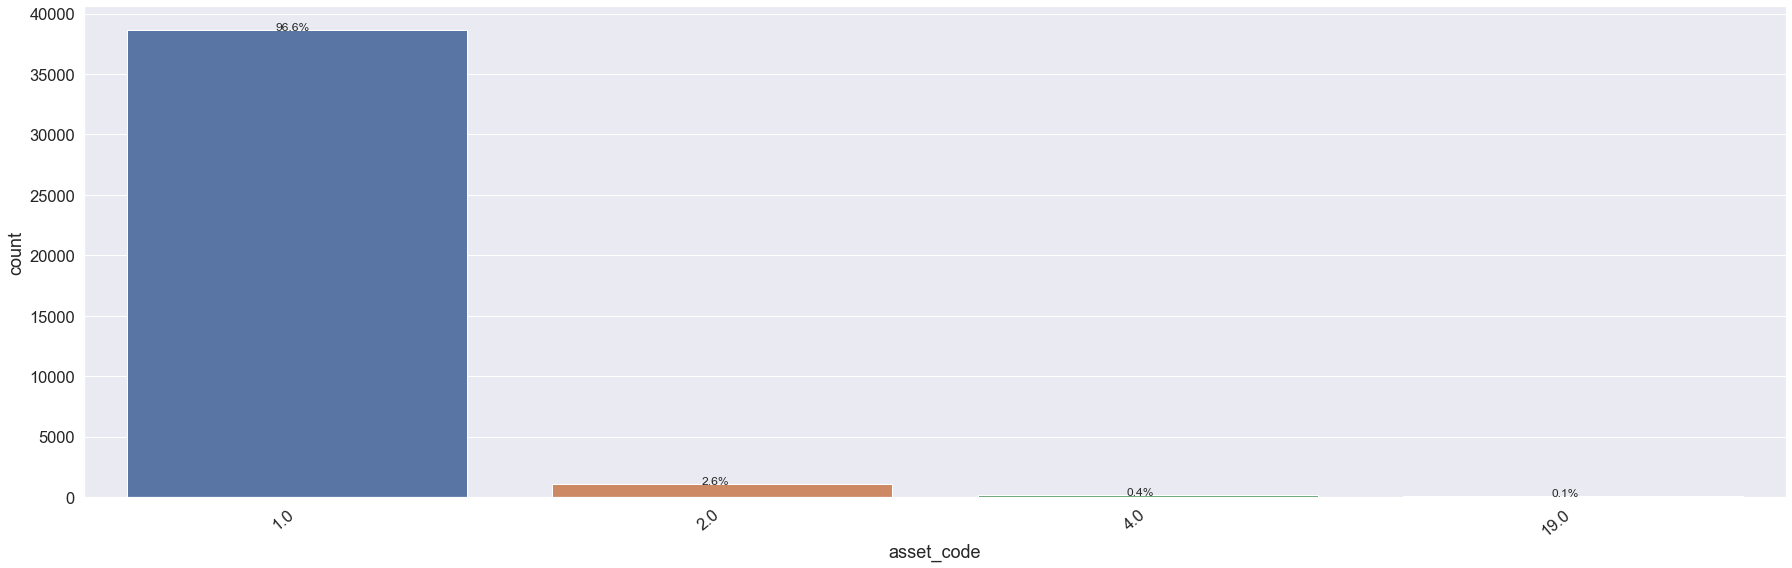

In [495]:
plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='asset_code')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['asset_code'])

In [496]:
plotting_percentages_plotly(df,'asset_code','approved')

## Portfolio_type: NA present - 5

In [490]:
df['portfolio_type'].value_counts()
# Revolving credit, Installment credit, Mortgage, Microfinance

R    23870
I    15102
M     1013
F        9
Name: portfolio_type, dtype: int64

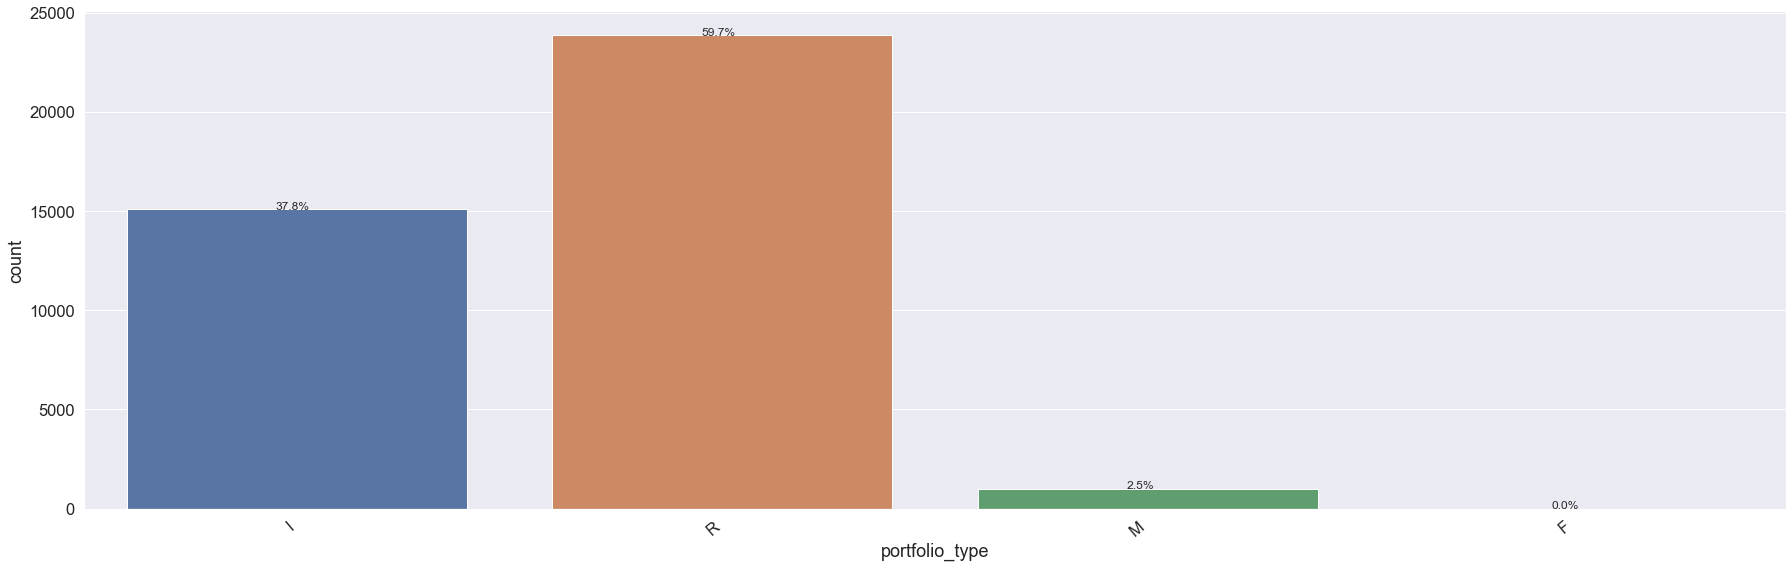

In [492]:
plt.figure(figsize=(25,8))

ax = sns.countplot(data=df,x='portfolio_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
without_hue(ax, df['portfolio_type'])

In [24]:
plotting_percentages_plotly(df,'portfolio_type','approved')